<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 
style='margin:10px 5px'>BIRD STRIKE PREDICTION MODEL BASED ON THE 15 MOST FREQUENT AIRCRAFT OPERATORS</h2>
</div>

##### This project involves the predictions of bird strike on aircraft and how the indicated damage feature can be predicted based on the datasets used.

In [1]:
#importing libraries needed for the project
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore') # To ignore avoid warnings that may be prompted

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 
style='margin:10px 5px'>LOAD BIRD STRIKE DATASETS</h2>
</div>

In [3]:
bird_strike = pd.read_csv('strike_reports11.csv', encoding='utf-8')
bird_strike.head()

,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,...,DISTANCE,SKY,PRECIPITATION,INGESTED,INDICATED_DAMAGE,DAMAGE_LEVEL,SPECIES_ID,SPECIES,WARNED,SIZE
0,15/10/1990,10,1990,NaN,Night,KMIE,DELAWARE COUNTY REGIONAL ARPT,40.24235,-85.39586,NaN,...,NaN,No Cloud,None,False,False,N,UNKBS,Unknown bird - small,No,Small
1,1/8/1993,8,1993,NaN,Day,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,29.99339,-90.25803,1,...,0.0,NaN,NaN,False,False,N,UNKBM,Unknown bird - medium,Unknown,Medium
2,18/08/1996,8,1996,NaN,NaN,KORD,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,22R,...,0.0,NaN,NaN,False,False,N,ZT1,Blackbirds,Unknown,Small
3,19/09/1993,9,1993,NaN,Day,KMHT,MANCHESTER AIRPORT,42.93452,-71.43706,35,...,8.0,No Cloud,None,False,True,S,UNKBL,Unknown bird - large,No,Large
4,23/03/1991,3,1991,NaN,Night,KELP,EL PASO INTL ARPT,31.80667,-106.37781,26L,...,NaN,No Cloud,None,False,False,N,UNKBS,Unknown bird - small,No,Small


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 
style='margin:10px 5px'>EXPLORATORY DATA ANALYSIS</h2>
</div>

In [4]:
#checking the data size
bird_strike.shape

(255929, 43)

In [5]:
#checking duplicated data
bird_strike.duplicated().sum()

1067

In [6]:
#checking null values
bird_strike.isnull().sum()

INCIDENT_DATE            0
INCIDENT_MONTH           0
INCIDENT_YEAR            0
TIME                121042
TIME_OF_DAY         106427
AIRPORT_ID               0
AIRPORT                  0
LATITUDE             31244
LONGITUDE            31244
RUNWAY               62357
STATE                31244
FAAREGION            31244
LOCATION            226150
OPID                     9
OPERATOR                 0
REG                 103832
FLT                 144439
AIRCRAFT                 0
AMA                  71654
AMO                  82503
EMA                  87148
EMO                  90368
AC_CLASS             70465
AC_MASS              70963
TYPE_ENG             71383
NUM_ENGS             71153
ENG_1_POS            71840
ENG_2_POS            83956
ENG_3_POS           243317
ENG_4_POS           252876
PHASE_OF_FLIGHT      96074
HEIGHT              120299
SPEED               168662
DISTANCE             91888
SKY                 129035
PRECIPITATION       133520
INGESTED                 0
I

In [7]:
#checking datatypes
bird_strike.dtypes

INCIDENT_DATE        object
INCIDENT_MONTH        int64
INCIDENT_YEAR         int64
TIME                 object
TIME_OF_DAY          object
AIRPORT_ID           object
AIRPORT              object
LATITUDE            float64
LONGITUDE           float64
RUNWAY               object
STATE                object
FAAREGION            object
LOCATION             object
OPID                 object
OPERATOR             object
REG                  object
FLT                  object
AIRCRAFT             object
AMA                  object
AMO                  object
EMA                 float64
EMO                  object
AC_CLASS             object
AC_MASS             float64
TYPE_ENG             object
NUM_ENGS            float64
ENG_1_POS           float64
ENG_2_POS           float64
ENG_3_POS           float64
ENG_4_POS           float64
PHASE_OF_FLIGHT      object
HEIGHT              float64
SPEED               float64
DISTANCE            float64
SKY                  object
PRECIPITATION       

In [8]:
#checking data info
bird_strike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255929 entries, 0 to 255928
Data columns (total 43 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   INCIDENT_DATE     255929 non-null  object 
 1   INCIDENT_MONTH    255929 non-null  int64  
 2   INCIDENT_YEAR     255929 non-null  int64  
 3   TIME              134887 non-null  object 
 4   TIME_OF_DAY       149502 non-null  object 
 5   AIRPORT_ID        255929 non-null  object 
 6   AIRPORT           255929 non-null  object 
 7   LATITUDE          224685 non-null  float64
 8   LONGITUDE         224685 non-null  float64
 9   RUNWAY            193572 non-null  object 
 10  STATE             224685 non-null  object 
 11  FAAREGION         224685 non-null  object 
 12  LOCATION          29779 non-null   object 
 13  OPID              255920 non-null  object 
 14  OPERATOR          255929 non-null  object 
 15  REG               152097 non-null  object 
 16  FLT               11

In [9]:
#checking data uniqueness
bird_strike.nunique()

INCIDENT_DATE       11567
INCIDENT_MONTH         12
INCIDENT_YEAR          32
TIME                 1480
TIME_OF_DAY             4
AIRPORT_ID           2492
AIRPORT              2492
LATITUDE             2481
LONGITUDE            2483
RUNWAY                869
STATE                  63
FAAREGION              10
LOCATION             8429
OPID                  592
OPERATOR              590
REG                 39300
FLT                 10597
AIRCRAFT              586
AMA                    96
AMO                   120
EMA                    37
EMO                    99
AC_CLASS                5
AC_MASS                 5
TYPE_ENG                7
NUM_ENGS                4
ENG_1_POS               7
ENG_2_POS               7
ENG_3_POS               5
ENG_4_POS               4
PHASE_OF_FLIGHT        12
HEIGHT                664
SPEED                 279
DISTANCE              189
SKY                     3
PRECIPITATION          12
INGESTED                2
INDICATED_DAMAGE        2
DAMAGE_LEVEL

In [10]:
#creating a variable to store the percentages of the null values in the strike data
missing_percentages = bird_strike.isna().sum().sort_values(ascending = False) / len(bird_strike)
#creating a variable to store the percentages of the null values in the strike data that is not equal
#to zero
missingvalues_notequal_tozero = missing_percentages[missing_percentages != 0]

In [11]:
#creating a variable to store the first 20 null values in the strike data that is not equal to zero
nullvalues_20 = missingvalues_notequal_tozero.head(20)

<AxesSubplot:>

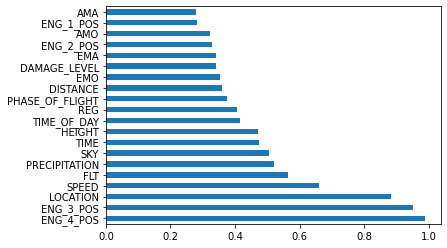

In [12]:
#plot showing some features in the strike data that have null values != 0
nullvalues_20.plot(kind = 'barh')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 
style='margin:10px 5px'>DATA VISUALIZATION</h2>
</div>

##### UNIVARIATE ANALYSIS 

Day      91748
Night    45446
Dusk      6814
Dawn      5494
Name: TIME_OF_DAY, dtype: int64

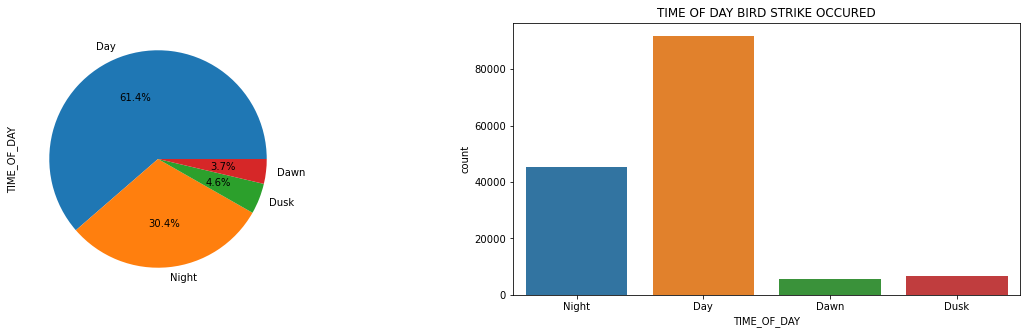

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
bird_strike['TIME_OF_DAY'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.ylabel('')
plt.title('TIME OF DAY BIRD STRIKE OCCURED')
sns.countplot(bird_strike['TIME_OF_DAY'])
bird_strike['TIME_OF_DAY'].value_counts()

TIME_OF_DAY category has 4 uniqueness that is, Night, Day, Dawn and Dusk. The Pie chart ahows that the bird strike occurs mostly during the day with 61.4% , followed by Night with 30.4% while the Dusk is 4.6% and Dawn which has the least occurence of 3.7%.

8     36129
9     34486
7     32532
10    32519
5     24933
6     21064
4     18015
11    17394
3     12415
12     9836
1      8470
2      8136
Name: INCIDENT_MONTH, dtype: int64

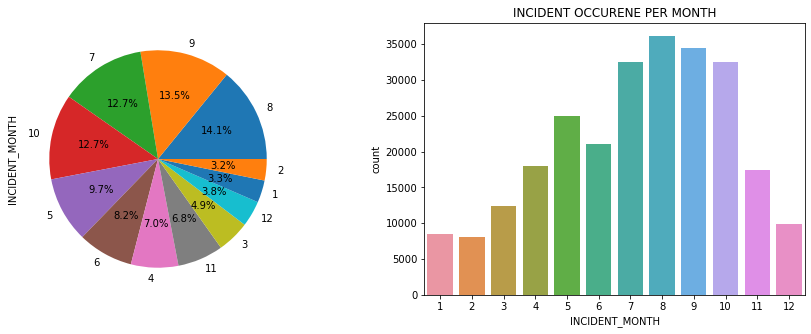

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
bird_strike['INCIDENT_MONTH'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.subplot(1,2,2)
plt.ylabel('')
plt.title('INCIDENT OCCURENE PER MONTH')

sns.countplot(bird_strike['INCIDENT_MONTH'])
bird_strike['INCIDENT_MONTH'].value_counts()

The highest month with bird strike occurence is August with it reoccuring 36,129 times which is 14.1% of the total number of occurences while the least month of occurences is February having 8,136 which 3.2% of the total occurences and January is close to it with 8,470 that is, 3.2% of total occurences. Perhaps there is a season where the bird stirke escalate like between July - to - October according to our dataset.

March- May (spring);
June - August (Summer);
September - November (Autumn/Fall);
December - February(Winter)

ASO    46531
AEA    36475
AGL    35573
ASW    29624
AWP    28214
ANM    23297
ACE    10740
ANE     8350
FGN     4550
AAL     1331
Name: FAAREGION, dtype: int64

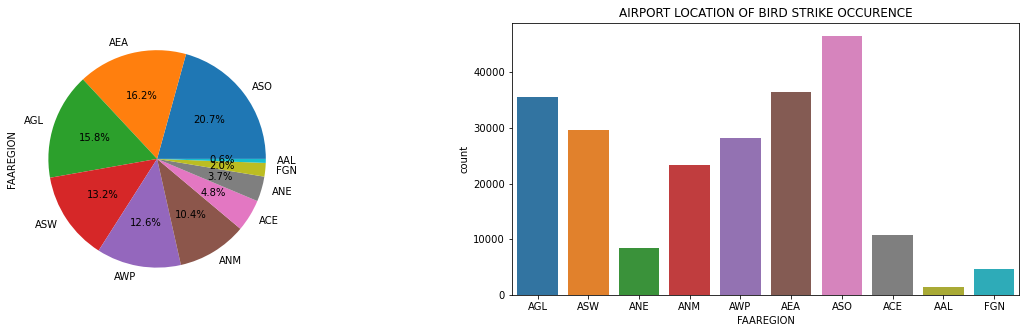

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
bird_strike['FAAREGION'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.ylabel('')
plt.title('AIRPORT LOCATION OF BIRD STRIKE OCCURENCE')
sns.countplot(bird_strike['FAAREGION'])
bird_strike['FAAREGION'].value_counts()

Airport located at AAL has experience the lowest bird strike experience while ASO had the highest experience with 46,531 which is 20.7% of the higher than other location. I think the environmental factor should be put into consideration in dealing with the bird strike in the airport

A    181604
B      3848
C         6
J         5
Y         1
Name: AC_CLASS, dtype: int64

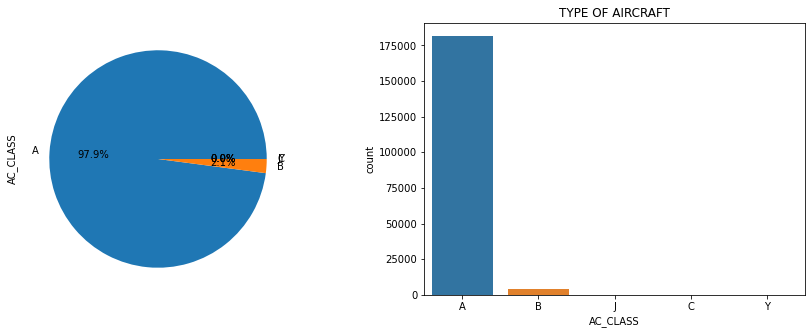

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
bird_strike['AC_CLASS'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.ylabel('')
plt.title('TYPE OF AIRCRAFT')
sns.countplot(bird_strike['AC_CLASS'])
bird_strike['AC_CLASS'].value_counts()

A has the highest percentage of 97.6% followed by B with 2.1%

4.0    127390
3.0     31766
2.0     11975
1.0     11726
5.0      2109
Name: AC_MASS, dtype: int64

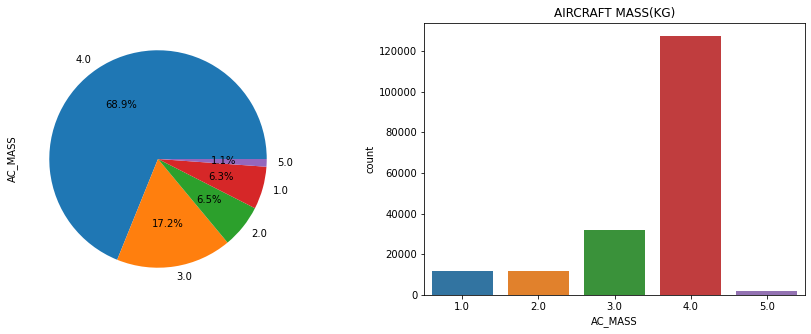

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
bird_strike['AC_MASS'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.ylabel('')
plt.title('AIRCRAFT MASS(KG)')
sns.countplot(bird_strike['AC_MASS'])
bird_strike['AC_MASS'].value_counts()

The highest Aircraft Mass is 4kg with 68.9% and the least is 5kg with 1.1%

D    154469
C     14156
A     12035
F      3545
B       336
E         4
Y         1
Name: TYPE_ENG, dtype: int64

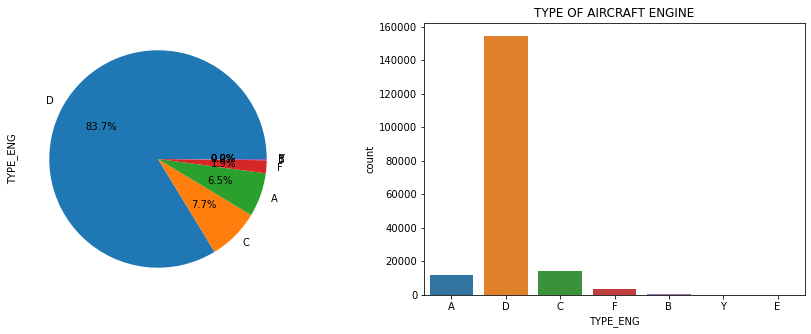

In [18]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
bird_strike['TYPE_ENG'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.ylabel('')
plt.title('TYPE OF AIRCRAFT ENGINE')
sns.countplot(bird_strike['TYPE_ENG'])
bird_strike['TYPE_ENG'].value_counts()

The TYPE_ENG feature has type D engine with the highest value of 154,469 and 83.7% while Type Y engine has the least value of 1 which are other type of engine which are not specify in our dataset

None                112043
Rain                  7200
Fog                   2384
Snow                   425
Fog, Rain              286
Rain, Snow              22
None, Snow              17
Fog, Snow               14
Fog, None                6
None, Rain               6
Fog, Rain, Snow          5
None, Rain, Snow         1
Name: PRECIPITATION, dtype: int64

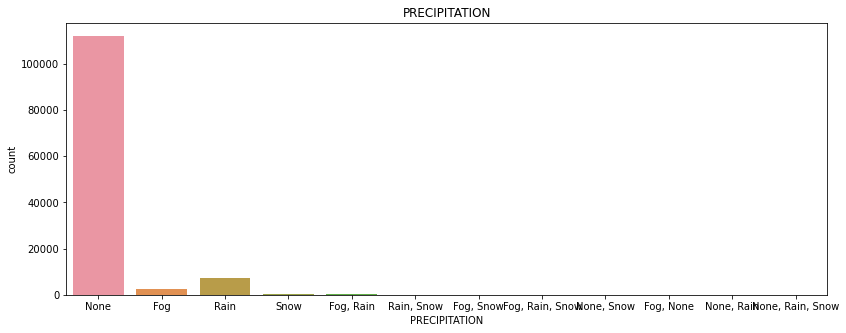

In [19]:
plt.figure(figsize=(30,5))
plt.subplot(1,2,2)
plt.ylabel('')
plt.title('PRECIPITATION')
sns.countplot(bird_strike['PRECIPITATION'])
bird_strike['PRECIPITATION'].value_counts()

Approach        67413
Landing Roll    28875
Take-off Run    27595
Climb           24850
En Route         4786
Departure        2078
Descent          2074
Local             857
Arrival           626
Taxi              585
Parked            105
Unknown            11
Name: PHASE_OF_FLIGHT, dtype: int64

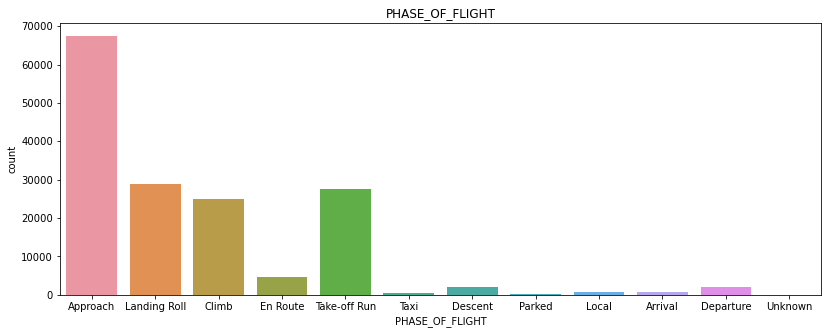

In [20]:
plt.figure(figsize=(30,5))
plt.subplot(1,2,2)
plt.ylabel('')
plt.title('PHASE_OF_FLIGHT')
sns.countplot(bird_strike['PHASE_OF_FLIGHT'])
bird_strike['PHASE_OF_FLIGHT'].value_counts()

PHASE_OF_FLIGHT consist of 12 unique values with Approach being the highest of 67,413 and unknown is the least value of 11 of when the bird strike occurred

No Cloud      61040
Some Cloud    43866
Overcast      21988
Name: SKY, dtype: int64

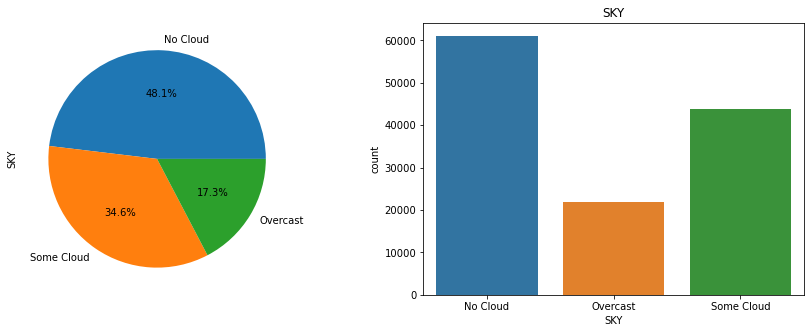

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
bird_strike['SKY'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.ylabel('')
plt.title('SKY')
sns.countplot(bird_strike['SKY'])
bird_strike['SKY'].value_counts()

The SKY feature include any type of cloud that covers the aircraft. It comprises of 3 uniques values namely No Cloud (48.1%), Overcast SKY(17.3%), Some Cloud (34.6%)

N     150308
M       8412
M?      5791
S       4120
D         76
Name: DAMAGE_LEVEL, dtype: int64

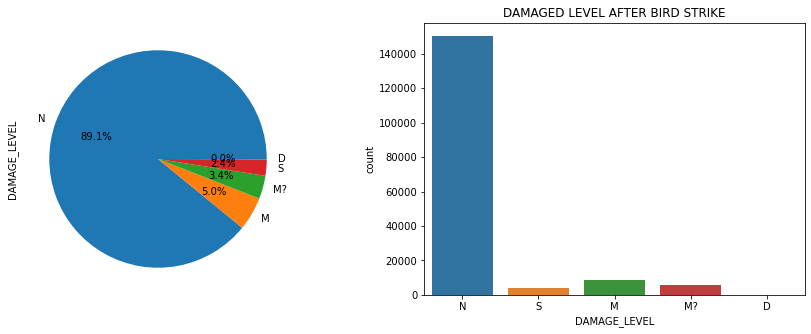

In [22]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
bird_strike['DAMAGE_LEVEL'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.ylabel('')
plt.title('DAMAGED LEVEL AFTER BIRD STRIKE')
sns.countplot(bird_strike['DAMAGE_LEVEL'])
bird_strike['DAMAGE_LEVEL'].value_counts()

None (N) No damage was reported, has the highest number. Minor (M) means when the aircraft can be rendered airworthy by simple repairs or replacements and an extensive inspection is not necessary with 5% of the damage level. Uncertain level (M?),"The aircraft was damaged, but details as to the extent of the damage are lacking." Substantial(S) implies that 2.4% of the aircraft incurs damage or structural failure which adversely affects the structure strength, performance or flight characteristics of the aircraft and which would normally require major repair or replacement of the affected component." Destroyed(D),When the damage sustained makes it inadvisable to restore the aircraft to an airworthy condition, this means there ahas not been situation where an aircraft is completely destroyed as a result of bird strike but has inccured 3.4% of uncertain level of damage

False    244539
True      11390
Name: INGESTED, dtype: int64

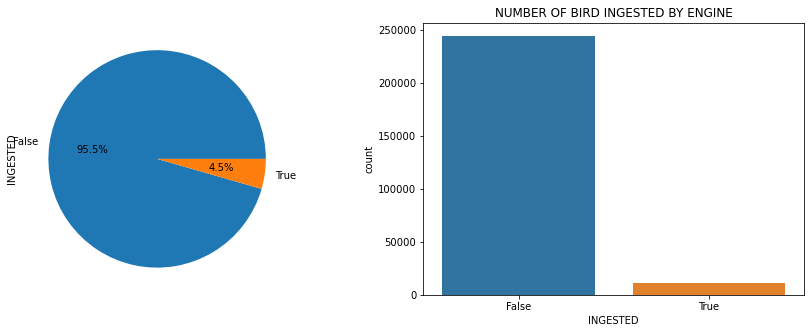

In [23]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
bird_strike['INGESTED'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.ylabel('')
plt.title('NUMBER OF BIRD INGESTED BY ENGINE')
sns.countplot(bird_strike['INGESTED'])
bird_strike['INGESTED'].value_counts()

4.5% of the bird were ingested by the engine

Small     156890
Medium     63237
Large      16589
Name: SIZE, dtype: int64

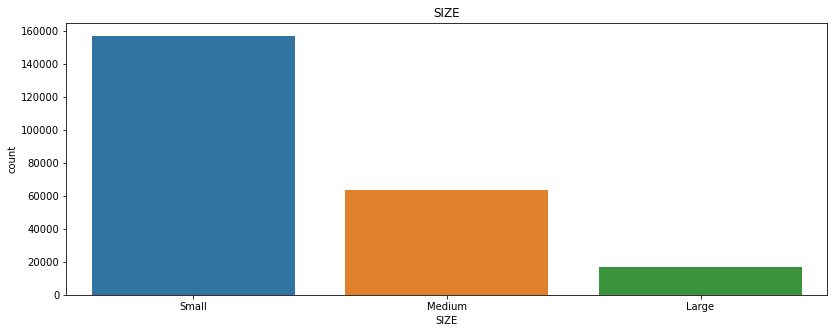

In [24]:
%matplotlib inline
plt.figure(figsize=(30,5))
plt.subplot(1,2,2)
plt.ylabel('')
plt.title('SIZE')
sns.countplot(bird_strike['SIZE'])
bird_strike['SIZE'].value_counts()

Unknown    150743
No          58847
Yes         46339
Name: WARNED, dtype: int64

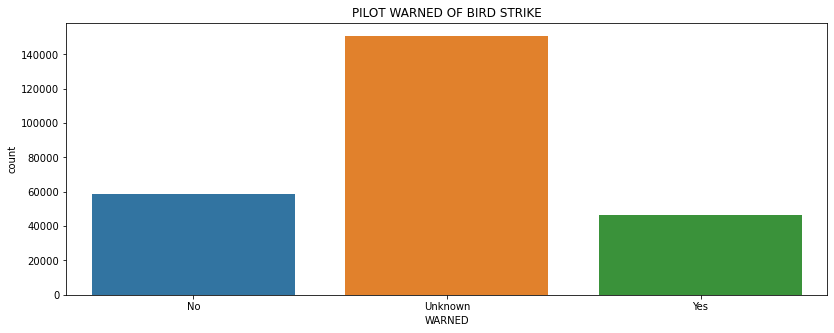

In [25]:
%matplotlib inline
plt.figure(figsize=(30,5))
plt.subplot(1,2,2)
plt.ylabel('')
plt.title('PILOT WARNED OF BIRD STRIKE')
sns.countplot(bird_strike['WARNED'])
bird_strike['WARNED'].value_counts()

Pilot warned of bird strike is unknown many times according to the charts, therefore all unknown rows will be droped from the datasets

False    237500
True      18429
Name: INDICATED_DAMAGE, dtype: int64

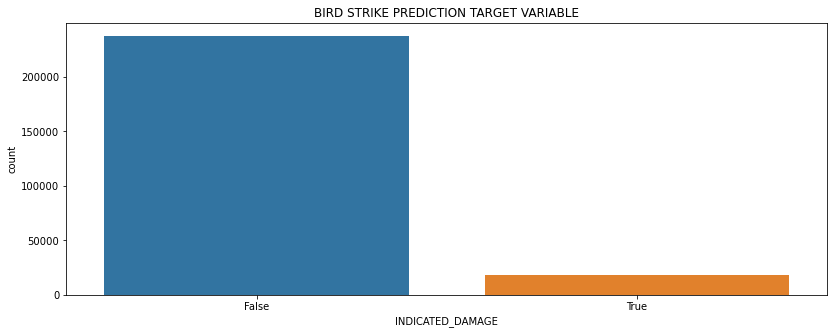

In [26]:
%matplotlib inline
plt.figure(figsize=(30,5))
plt.subplot(1,2,2)
plt.ylabel('')
plt.title('BIRD STRIKE PREDICTION TARGET VARIABLE')
sns.countplot(bird_strike['INDICATED_DAMAGE'])
bird_strike['INDICATED_DAMAGE'].value_counts()

The target variable needs to be upsampled due to be balanced and used for model to avoid a biased result

Text(0.5, 1.0, 'TOP (20) STATE WHERE BIRD STRIKES OCCURRED')

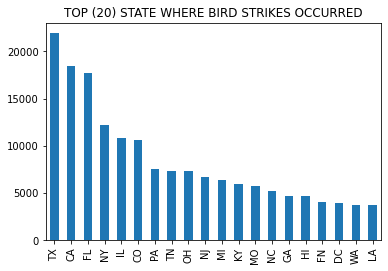

In [27]:
state= bird_strike['STATE'].value_counts()
st =state.head(20)
st.plot(kind= 'bar')

plt.title('TOP (20) STATE WHERE BIRD STRIKES OCCURRED')

it can be deduced that the following states (CA-California,FL-Florida,TX-Texas and 
NY-New York) had the highest bird strikes.

Text(0.5, 1.0, 'TOP (20) AIRPORTS WHERE BIRD STRIKES OCCURRED')

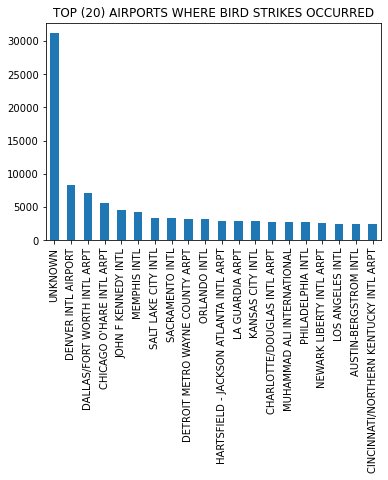

In [28]:
airport = bird_strike['AIRPORT'].value_counts()
aport =airport.head(20)
aport.plot(kind= 'bar')
plt.title('TOP (20) AIRPORTS WHERE BIRD STRIKES OCCURRED')

DENVER INTL AIRPORT have the highest bird strikes followed DALLAS/FORT WORTH INTL 
AIRPORT.

Unknown bird - small     45375
Unknown bird - medium    37575
Unknown bird             18808
Mourning dove            12746
Killdeer                  8403
Barn swallow              8167
American kestrel          7669
Gulls                     7186
Horned lark               6623
European starling         5573
Sparrows                  3938
Rock pigeon               3847
Eastern meadowlark        3563
Red-tailed hawk           3554
Unknown bird - large      3510
Cliff swallow             2525
Western meadowlark        2104
Ring-billed gull          2014
Canada goose              1950
American robin            1822
Name: SPECIES, dtype: int64

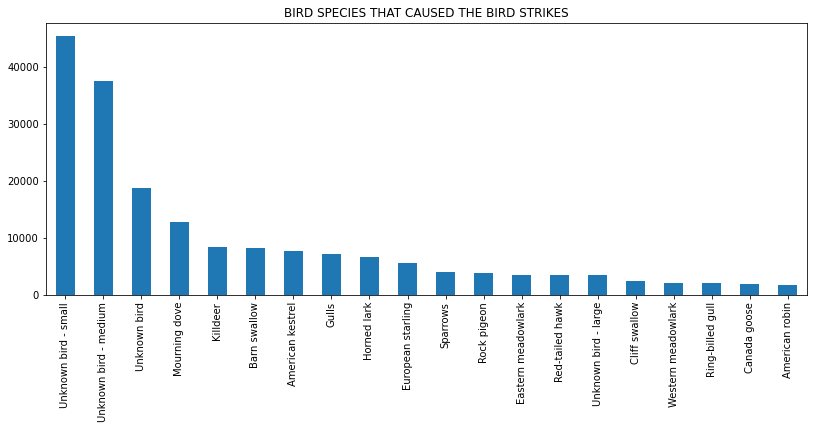

In [29]:
%matplotlib inline
plt.figure(figsize=(30,5))
plt.subplot(1,2,2)
plt.ylabel('')
plt.title('BIRD SPECIES THAT CAUSED THE BIRD STRIKES')

species = bird_strike['SPECIES'].value_counts().head(20)
species.plot(kind = 'bar')
species

The above chart shows the highest number of species of bird are unknown, which means these unknown data needs to be droped provided is above 60% of the species data column

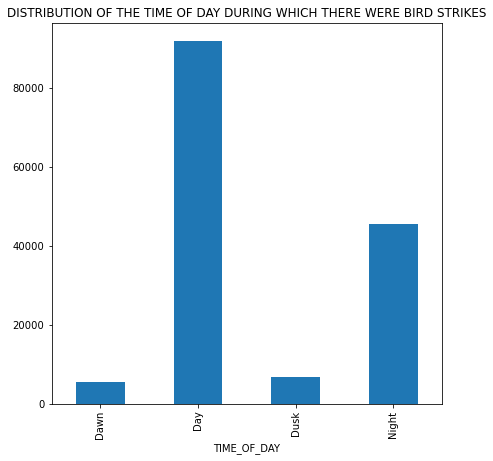

In [30]:
#
df = bird_strike.groupby('TIME_OF_DAY').size()
df.plot(kind='bar', subplots=True, figsize=(7, 7))
plt.title("DISTRIBUTION OF THE TIME OF DAY DURING WHICH THERE WERE BIRD STRIKES")
plt.ylabel("")
plt.show()

<AxesSubplot:>

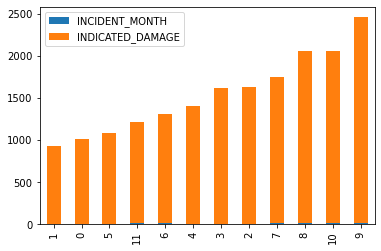

In [31]:
#Group sort Month and truck loads in ascending order 
strike_month= bird_strike.groupby(['INCIDENT_MONTH'])['INDICATED_DAMAGE'].sum().reset_index(name='INDICATED_DAMAGE').sort_values(['INDICATED_DAMAGE'], ascending=True)
strike_month.plot(kind='bar', stacked = True)

In [32]:
#To find the top 20 -----> Applicable to continuous variable

#spec= bird_strike.nlargest(20, ['SPECIES'])

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 
style='margin:10px 5px'>DATA CLEANING</h2>
</div>

In [33]:
bird_strike.drop(['INCIDENT_YEAR','AIRPORT_ID','RUNWAY','SPECIES_ID','AMO','EMO','FLT','EMA','AMA','TIME_OF_DAY',
                  'DAMAGE_LEVEL','ENG_1_POS','ENG_2_POS','ENG_3_POS','ENG_4_POS','REG','OPID','INGESTED',
                  'WARNED'], inplace= True, axis=1)

In [34]:
bird_strike.shape

(255929, 24)

In [35]:
bird_strike['TIME'].unique()

array([nan, '19:05', '8:08', ..., '%09:0', '%12:0', '%13:0'], dtype=object)

In [36]:
#remove the %symbol from the column TIME
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-","/",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]

for char in spec_chars:
    bird_strike['TIME'] = bird_strike['TIME'].str.replace(char, '')
bird_strike['TIME'].unique()

array([nan, '19:05', '8:08', ..., '09:0', '12:0', '13:0'], dtype=object)

In [37]:
bird_strike['TIME'].isnull().sum()

121042

In [38]:
bird_strike['TIME'].tail()

255924    11:20
255925     8:25
255926     0:00
255927    15:40
255928    19:30
Name: TIME, dtype: object

In [39]:
#removing every data without Time(':') format

bird_strike = bird_strike[bird_strike['TIME'].str.contains(':', na = True)]

In [40]:
#confirm all the time anomalies are removed
#bird_strike['TIME'].unique()

def confirm_valid_time(x):
    tokens = x.split(':')
    if len(tokens) == 2:
        return x
    else:
        return 'y' + x

In [41]:
#bird_strike['TIME'] = 0:84
for i in bird_strike['TIME']:
    if i == '0:84':
            print(i)

0:84


In [42]:
# remove rows using the drop() function

bird_strike.drop(bird_strike.index[bird_strike['TIME'] == "0:84"],inplace=True)

In [43]:
#### function to check missing value %
def missing(dff):
    print("Missing values in %"+"\n")
    print((round((dff.isnull().sum() * 100/ len(dff)),2)).sort_values(ascending=False))
    print("------------------------------"+"\n")
    
missing(bird_strike)

Missing values in %

LOCATION            88.36
SPEED               65.90
PRECIPITATION       52.17
SKY                 50.42
TIME                47.30
HEIGHT              47.01
PHASE_OF_FLIGHT     37.54
DISTANCE            35.90
TYPE_ENG            27.89
NUM_ENGS            27.80
AC_MASS             27.73
AC_CLASS            27.54
LATITUDE            12.21
LONGITUDE           12.21
STATE               12.21
FAAREGION           12.21
SIZE                 7.51
INCIDENT_MONTH       0.00
AIRCRAFT             0.00
OPERATOR             0.00
AIRPORT              0.00
INDICATED_DAMAGE     0.00
SPECIES              0.00
INCIDENT_DATE        0.00
dtype: float64
------------------------------



In [44]:
#dropping columns with null value greater than 60%

bird_strike = \
bird_strike.drop(bird_strike.loc[:,list((100*(bird_strike.isnull().sum()/len(bird_strike))>=60))].columns, 1)

In [45]:
bird_strike.shape

(255909, 22)

In [46]:
bird_strike['SPECIES'].value_counts()

Unknown bird - small           45369
Unknown bird - medium          37571
Unknown bird                   18807
Mourning dove                  12744
Killdeer                        8403
                               ...  
Spotted flycatcher                 1
Western small-footed myotis        1
Mynas                              1
Thick-billed kingbird              1
Mourning Dove                      1
Name: SPECIES, Length: 840, dtype: int64

In [47]:
# remove rows using the drop() function

bird_strike.drop(bird_strike.index[bird_strike['SPECIES'] == "Unknown bird"],inplace=True)
bird_strike.drop(bird_strike.index[bird_strike['SPECIES'] == "Unknown bird - small"],inplace=True)
bird_strike.drop(bird_strike.index[bird_strike['SPECIES'] == "Unknown bird - large"],inplace=True)
bird_strike.drop(bird_strike.index[bird_strike['SPECIES'] == "Unknown bird - medium"],inplace=True)
bird_strike.drop(bird_strike.index[bird_strike['AIRCRAFT'] == "UNKNOWN"],inplace=True)
bird_strike.drop(bird_strike.index[bird_strike['PHASE_OF_FLIGHT'] == "Unknown"],inplace=True)
bird_strike.drop(bird_strike.index[bird_strike['AIRPORT'] == "UNKNOWN"],inplace=True)
bird_strike.drop(bird_strike.index[bird_strike['OPERATOR'] == "UNKNOWN"],inplace=True)

In [48]:
bird_strike.shape

(69557, 22)

In [49]:
bird_strike.tail()

,INCIDENT_DATE,INCIDENT_MONTH,TIME,AIRPORT,LATITUDE,LONGITUDE,STATE,FAAREGION,OPERATOR,AIRCRAFT,...,TYPE_ENG,NUM_ENGS,PHASE_OF_FLIGHT,HEIGHT,DISTANCE,SKY,PRECIPITATION,INDICATED_DAMAGE,SPECIES,SIZE
255918,30/10/2021,10,21:11,MAHLON SWEET FLD,44.12326,-123.21869,OR,ANM,HORIZON AIR,DHC8 DASH 8,...,C,2.0,Approach,NaN,11.0,Some Cloud,None,False,Varied thrush,Small
255920,30/10/2021,10,22:45,ALBERT J ELLIS,34.82916,-77.61214,NC,ASO,ENDEAVOR AIR,CRJ900,...,D,2.0,Landing Roll,0.0,0.0,No Cloud,None,False,Savannah sparrow,Small
255923,31/10/2021,10,16:17,LEHIGH VALLEY INTL,40.65236,-75.44040,PA,AEA,ABX AIR,B-767-200,...,D,2.0,Landing Roll,0.0,0.0,Some Cloud,None,True,Lesser black-backed gull,Medium
255924,3/11/2021,11,11:20,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,IL,AGL,GOJET AIRLINES,CRJ700,...,D,2.0,Landing Roll,0.0,0.0,Some Cloud,None,False,Red-tailed hawk,Medium
255926,1/11/2021,11,0:00,AUSTIN-BERGSTROM INTL,30.19453,-97.66987,TX,ASW,DELTA AIR LINES,A-319,...,D,2.0,Take-off Run,0.0,0.0,Overcast,Fog,True,Mourning dove,Small


In [50]:
#Aggregate species based on bird strikes 
df_species = bird_strike.groupby(by=['SPECIES'])['AIRCRAFT',"INDICATED_DAMAGE"].count()
df_species.reset_index(level=0, inplace=True)

In [51]:
df_species.sort_values(by="SPECIES",ascending=False)
df_species=df_species[df_species.INDICATED_DAMAGE > 2000]
df_species

,SPECIES,AIRCRAFT,INDICATED_DAMAGE
14,American kestrel,2212,2212
41,Barn swallow,3897,3897
228,European starling,3158,3158
290,Gulls,6067,6067
317,Horned lark,2080,2080
336,Killdeer,2360,2360
400,Mourning dove,4119,4119
520,Rock pigeon,2054,2054
573,Sparrows,2815,2815


Text(0.5, 1.0, 'BIRDS WITH MOST INCIDENTS OF BIRD STRIKES')

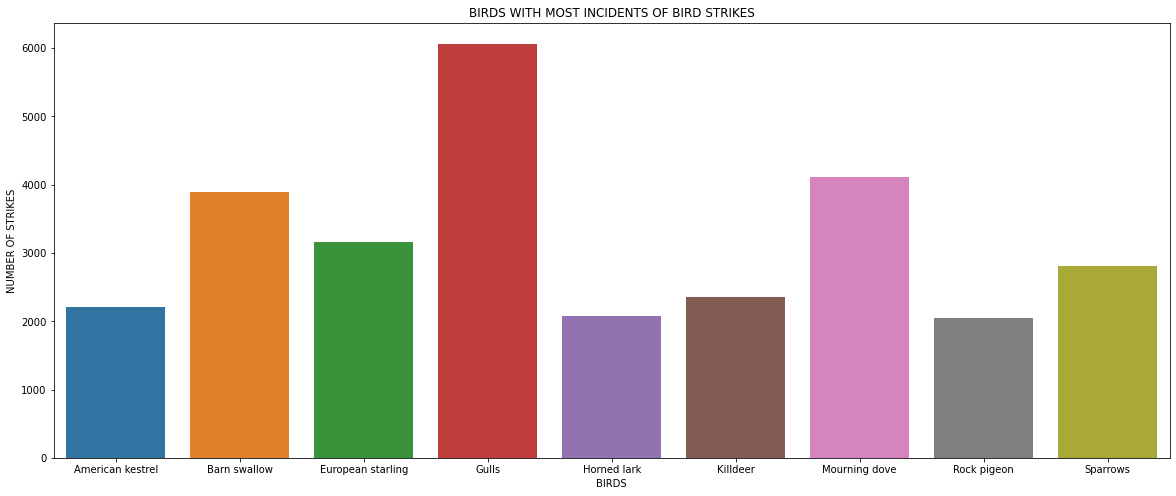

In [52]:
plt.figure(figsize=(20, 8))
sns.barplot(x="SPECIES",
    y="INDICATED_DAMAGE",
    data=df_species,
    ci=None )
plt.ylabel("NUMBER OF STRIKES", size=10)
plt.xlabel("BIRDS", size=10)
plt.title("BIRDS WITH MOST INCIDENTS OF BIRD STRIKES", size=12)

**Frpm the plot, Barn swallow and Mourning dove have the highest bird strikes while American kestrel has the least.
**From exploratory data analysis carried out on the dataset, the Barn swallow, Mourning dove, European starling, Killdeer and 
**American kestrel striked mostly in summer followed by fall, spring and winter.
**The Gulls striked mostly in spring followed by fall, summer and winter.
**The 6 birds all striked least in winter.
**Winter(December to February), 
**Summer(June to August), 
**Spring(March to May) and 
**Fall(September to November)

In [53]:
#Aggregate airports based on bird strikes 
df_airport = bird_strike.groupby(by=['AIRPORT'])["SPECIES","INDICATED_DAMAGE"].count()
df_airport.reset_index(level=0, inplace=True)

In [54]:
df_airport.sort_values(by="SPECIES",ascending=False)
df_airport=df_airport[df_airport.SPECIES > 1000]
df_airport.head(5)

,AIRPORT,SPECIES,INDICATED_DAMAGE
280,CHARLOTTE/DOUGLAS INTL ARPT,1141,1141
305,CHICAGO O'HARE INTL ARPT,1358,1358
401,DALLAS/FORT WORTH INTL ARPT,1553,1553
437,DENVER INTL AIRPORT,1756,1756
865,JOHN F KENNEDY INTL,1370,1370


Text(0.5, 1.0, 'AIRPORTS WITH MOST INCIDENCES OF BIRD STRIKES')

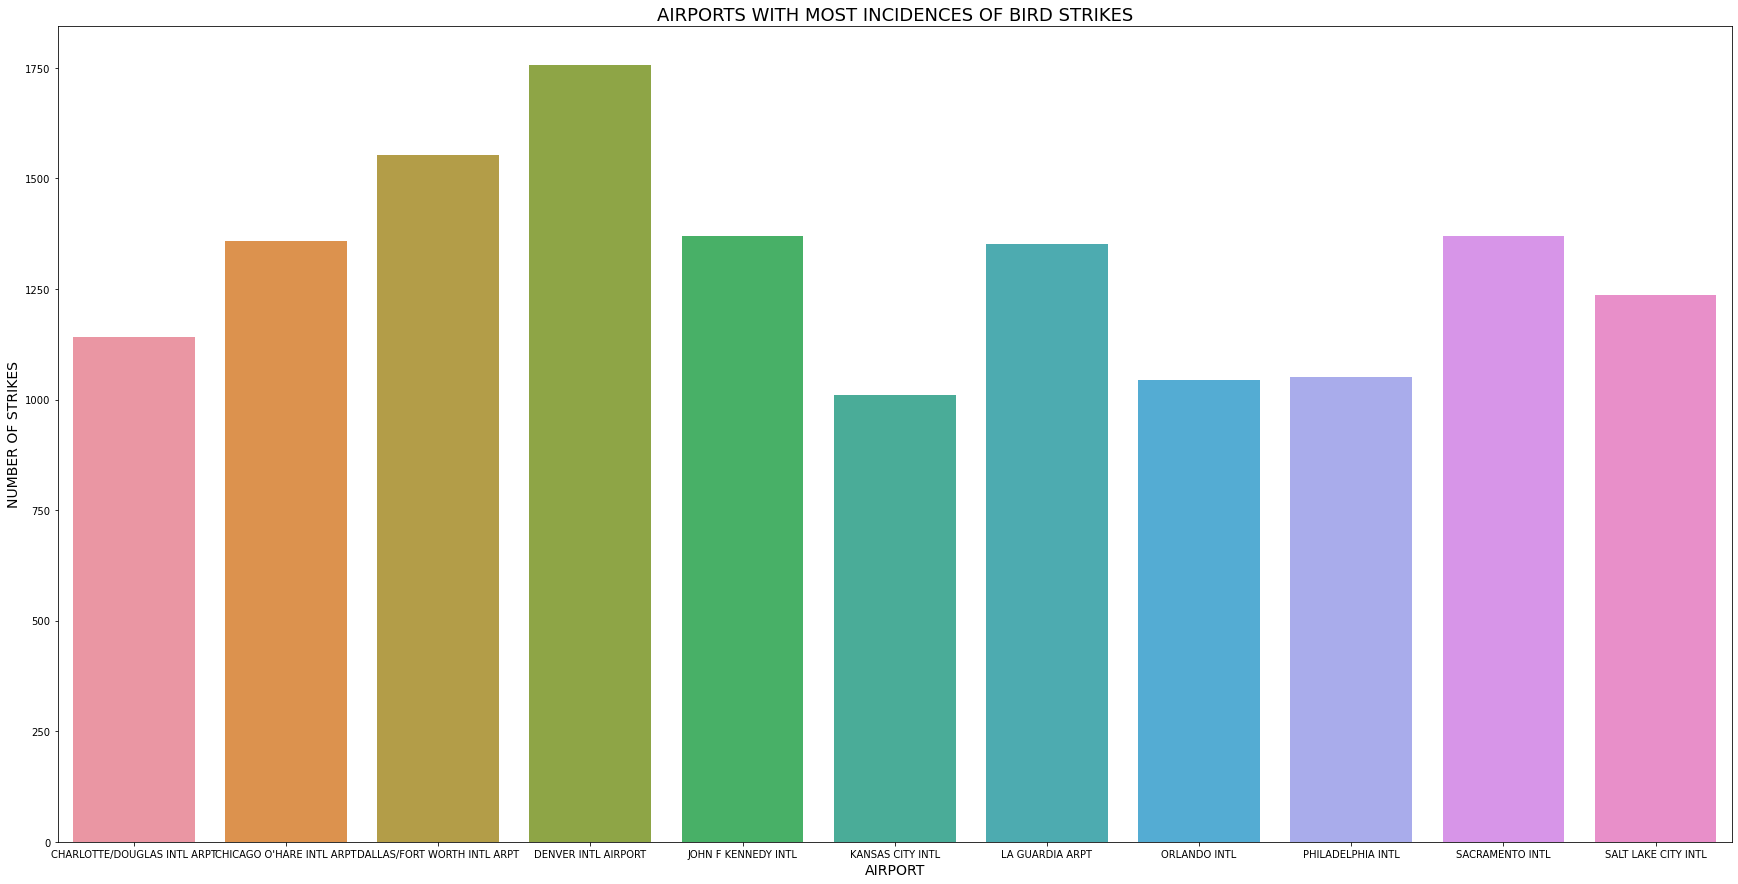

In [55]:
plt.figure(figsize=(30, 15))
sns.barplot(x="AIRPORT",
    y="SPECIES",
    data=df_airport,
    ci=None )
plt.ylabel("NUMBER OF STRIKES", size=14)
plt.xlabel("AIRPORT", size=14)
plt.title("AIRPORTS WITH MOST INCIDENCES OF BIRD STRIKES", size=18)

In [56]:
#Aggregate airline operators based on bird strikes 
df_operator = bird_strike.groupby(by=['OPERATOR'])["SPECIES","INDICATED_DAMAGE"].count()
df_operator.reset_index(level=0, inplace=True)

In [57]:
df_operator.sort_values(by="SPECIES",ascending=False)
df_operator=df_operator[df_operator.SPECIES > 3000]
df_operator.head(5)

,OPERATOR,SPECIES,INDICATED_DAMAGE
75,AMERICAN AIRLINES,5939,5939
120,BUSINESS,10742,10742
180,DELTA AIR LINES,5200,5200
436,SOUTHWEST AIRLINES,6402,6402
475,UNITED AIRLINES,3877,3877


Text(0.5, 1.0, 'AIRLINES WITH MOST INCIDENCES OF BIRD STRIKES')

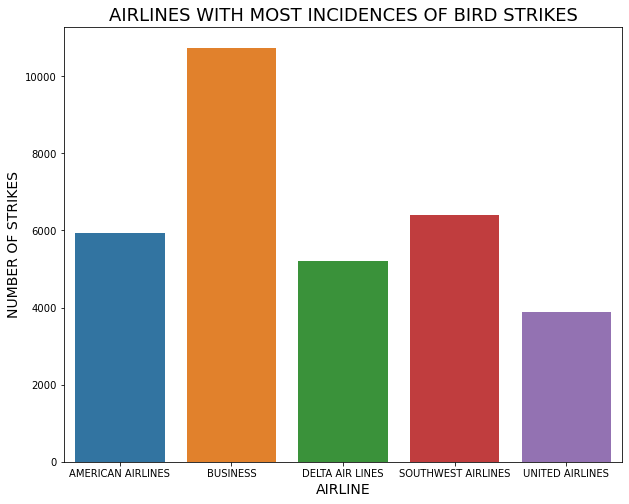

In [58]:
plt.figure(figsize=(10, 8))
sns.barplot(x="OPERATOR",
    y="SPECIES",
    data=df_operator,
    ci=None )
plt.ylabel("NUMBER OF STRIKES", size=14)
plt.xlabel("AIRLINE", size=14)
plt.title("AIRLINES WITH MOST INCIDENCES OF BIRD STRIKES", size=18)

In [59]:
#Aggregate species based on bird strikes 
df_month = bird_strike.groupby(by=['INCIDENT_MONTH'])["SPECIES","INDICATED_DAMAGE"].count()
df_month.reset_index(level=0, inplace=True)

In [60]:
df_month.sort_values(by="INCIDENT_MONTH",ascending=False)
df_month=df_month[df_month.INDICATED_DAMAGE > 2000]
df_month

,INCIDENT_MONTH,SPECIES,INDICATED_DAMAGE
0,1,2792,2792
1,2,2577,2577
2,3,3679,3679
3,4,4751,4751
4,5,5996,5996
5,6,5862,5862
6,7,9204,9204
7,8,10105,10105
8,9,8537,8538
9,10,7739,7740


Text(0.5, 1.0, 'MONTH WITH MOST INCIDENCES OF BIRD STRIKES')

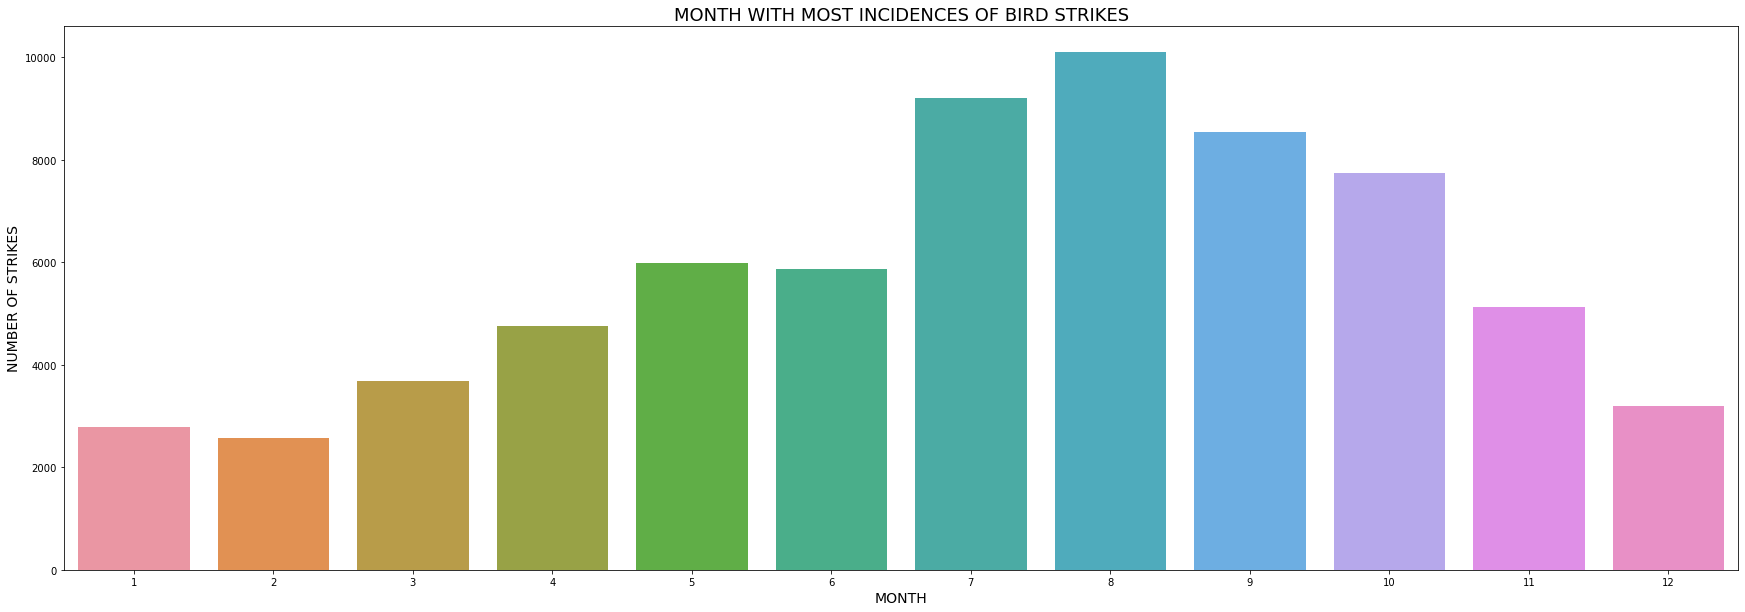

In [61]:
plt.figure(figsize=(30, 10))
sns.barplot(x="INCIDENT_MONTH",
    y="INDICATED_DAMAGE",
    data=df_month,
    ci=None )
plt.ylabel("NUMBER OF STRIKES", size=14)
plt.xlabel("MONTH", size=14)
plt.title("MONTH WITH MOST INCIDENCES OF BIRD STRIKES", size=18)

This output implies that the between 5th month (May) through the 8th (August) the bird strike occurrence on an aircraft increases and started to decline from september through December.Meaning that there are seasons when there's high occurence of bird strike

Check the airport, species that have their highest strikes between May and August

In [62]:
sp_month= (bird_strike.loc[:,['SPECIES', 'INCIDENT_MONTH', 'AIRPORT']])
sp_month.head()

,SPECIES,INCIDENT_MONTH,AIRPORT
2,Blackbirds,8,CHICAGO O'HARE INTL ARPT
10,Gulls,5,BOB HOPE ARPT
11,Rock pigeon,8,LONG BEACH-DAUGH FLD
13,"Raptors: Hawks, eagles, vultures, kites, ospre...",8,LANCASTER ARPT (PA)
14,Hawks,5,PEORIA INTL ARPT


In [63]:
sp_month.nunique()

SPECIES            699
INCIDENT_MONTH      12
AIRPORT           2046
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>DEALING WITH MISSING VALUE</h2>
</div>

In [64]:
bird_strike.isnull().sum()

INCIDENT_DATE           0
INCIDENT_MONTH          0
TIME                15378
AIRPORT                 0
LATITUDE               57
LONGITUDE              57
STATE                  57
FAAREGION              57
OPERATOR                0
AIRCRAFT                0
AC_CLASS              168
AC_MASS               361
TYPE_ENG              576
NUM_ENGS              457
PHASE_OF_FLIGHT       471
HEIGHT               8895
DISTANCE            19247
SKY                  8638
PRECIPITATION       10286
INDICATED_DAMAGE        0
SPECIES                 2
SIZE                  278
dtype: int64


##### Missing value will be fixed by splitting our datasets into X_train and X_test

In [65]:
#split datasets into X_train and X_test

X_train,X_test = \
train_test_split(bird_strike, test_size=0.3, random_state = 0)

In [66]:
X_train.head()

,INCIDENT_DATE,INCIDENT_MONTH,TIME,AIRPORT,LATITUDE,LONGITUDE,STATE,FAAREGION,OPERATOR,AIRCRAFT,...,TYPE_ENG,NUM_ENGS,PHASE_OF_FLIGHT,HEIGHT,DISTANCE,SKY,PRECIPITATION,INDICATED_DAMAGE,SPECIES,SIZE
205843,27/04/2019,4,11:28,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,IL,AGL,AMERICAN AIRLINES,A-321,...,D,2.0,Landing Roll,0.0,0.0,Overcast,None,False,Eastern meadowlark,Small
198635,8/10/2018,10,20:09,IGOR I SIKORSKY MEMORIAL,41.16348,-73.12618,CT,ANE,BUSINESS,C-680,...,D,2.0,Landing Roll,0.0,0.0,Overcast,Rain,True,White-tailed deer,Large
140935,8/6/2014,6,19:00,ORLANDO INTL,28.42889,-81.31603,FL,ASO,DELTA AIR LINES,B-757-200,...,D,2.0,Landing Roll,0.0,0.0,Some Cloud,None,False,Mourning dove,Small
68655,7/8/2006,8,10:00,BALTIMORE/WASH INTL THURGOOD MARSHAL ARPT,39.17540,-76.66820,MD,AEA,SOUTHWEST AIRLINES,B-737,...,D,2.0,Approach,NaN,NaN,No Cloud,None,False,European starling,Small
162632,10/10/2015,10,21:13,PORTLAND INTL (OR),45.58872,-122.59750,OR,ANM,HORIZON AIR,DHC8 DASH 8,...,C,2.0,Approach,NaN,NaN,Some Cloud,Rain,False,Western meadowlark,Small


In [67]:
X_train.shape

(48689, 22)

In [68]:
X_test.shape

(20868, 22)

In [69]:
X_train.isnull().sum()

INCIDENT_DATE           0
INCIDENT_MONTH          0
TIME                10794
AIRPORT                 0
LATITUDE               42
LONGITUDE              42
STATE                  42
FAAREGION              42
OPERATOR                0
AIRCRAFT                0
AC_CLASS              120
AC_MASS               253
TYPE_ENG              401
NUM_ENGS              321
PHASE_OF_FLIGHT       332
HEIGHT               6225
DISTANCE            13452
SKY                  5979
PRECIPITATION        7120
INDICATED_DAMAGE        0
SPECIES                 2
SIZE                  199
dtype: int64

In [70]:
#Filtering the columns with null values
null_col_train = X_train.loc[:, X_train.isna().any()]
null_col_train.tail()

,TIME,LATITUDE,LONGITUDE,STATE,FAAREGION,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,PHASE_OF_FLIGHT,HEIGHT,DISTANCE,SKY,PRECIPITATION,SPECIES,SIZE
80051,8:40,42.21206,-83.34884,MI,AGL,A,4.0,D,2.0,Take-off Run,0.0,0.0,No Cloud,None,Hawks,Medium
171245,8:45,41.97960,-87.90446,IL,AGL,A,4.0,D,2.0,Take-off Run,0.0,0.0,Overcast,None,Rock pigeon,Small
157954,7:09,43.66499,-92.93339,MN,AGL,A,3.0,D,2.0,Take-off Run,0.0,0.0,Overcast,Rain,Canada goose,Large
161552,22:00,40.84928,-77.84869,PA,AEA,A,3.0,D,2.0,Approach,NaN,NaN,Some Cloud,None,Blackpoll warbler,Small
250409,0:00,42.21206,-83.34884,MI,AGL,A,4.0,D,2.0,Landing Roll,0.0,0.0,Some Cloud,None,Killdeer,Small


Text(0.5, 1.0, 'Quantifying missing data')

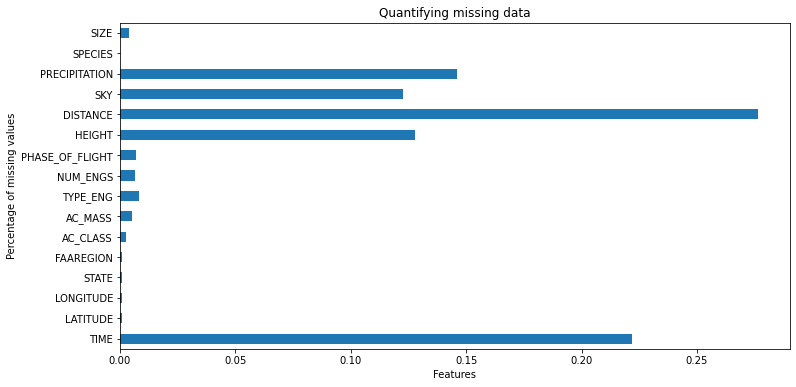

In [71]:
#checking the percentage of missing value with a bar plot
null_col_train.isnull().mean().plot.barh(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Features')
plt.title('Quantifying missing data')

In [72]:
#filtering features with continuous variable for training set
continuous_F = null_col_train.select_dtypes(['category', 'float']).columns
for col in continuous_F:
    print('{}: {} unique values'.format(col, X_train[col].nunique()))

LATITUDE: 1778 unique values
LONGITUDE: 1779 unique values
AC_MASS: 5 unique values
NUM_ENGS: 4 unique values
HEIGHT: 310 unique values
DISTANCE: 111 unique values


In [73]:
#Features with float dtypes
df= ['LATITUDE','LONGITUDE','AC_MASS','NUM_ENGS','HEIGHT','DISTANCE']


Text(0.5, 1.0, 'DISTRIBUTION FOR CONTINUOUS FEATURES WITH NULL VALUE ')

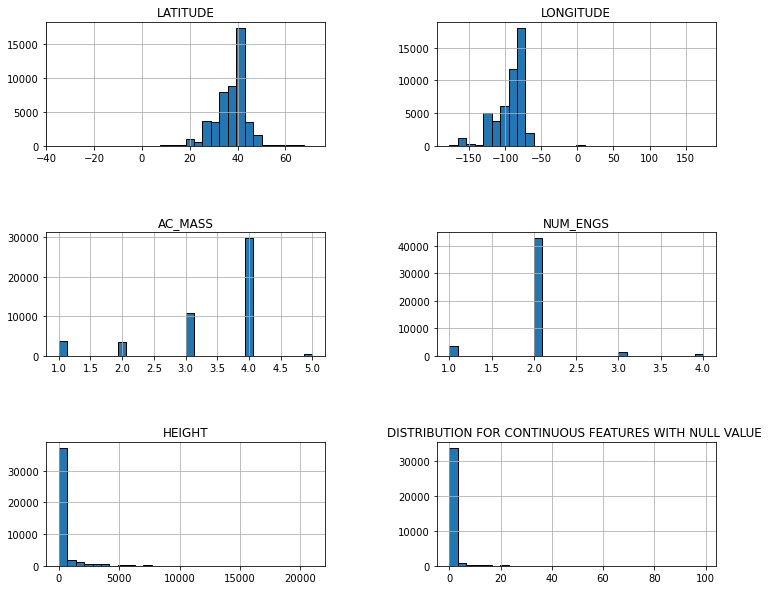

In [74]:
#Check the distribution of the columns with null values
null_col_train.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.title('DISTRIBUTION FOR CONTINUOUS FEATURES WITH NULL VALUE ')

In [75]:
#import libraries from sci-kit learn to fix the missing data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge

#from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [76]:
#Simple imputation method with media on some specific column
#Let's group a subset of columns to which we want to apply different 
#imputation techniques in lists:
features_num_median = ['AC_MASS','NUM_ENGS']
features_cat_frequent = ['DISTANCE' ]

In [77]:
#Let's create a MICE imputer using Bayes regression as an estimator, 
#specifying the number of iteration cycles and setting random_state for reproducibility:

imputer = IterativeImputer(estimator = BayesianRidge(), max_iter=10, random_state=0)

In [78]:
df1= ['LATITUDE','LONGITUDE','AC_MASS','NUM_ENGS','HEIGHT','DISTANCE']
X_train[df1].head()

,LATITUDE,LONGITUDE,AC_MASS,NUM_ENGS,HEIGHT,DISTANCE
205843,41.97960,-87.90446,4.0,2.0,0.0,0.0
198635,41.16348,-73.12618,3.0,2.0,0.0,0.0
140935,28.42889,-81.31603,4.0,2.0,0.0,0.0
68655,39.17540,-76.66820,4.0,2.0,NaN,NaN
162632,45.58872,-122.59750,3.0,2.0,NaN,NaN


In [79]:
#Use fit IterativeImputer() to train set, so that it trains the estimators to 
#predict the missing values in each variable:
imputer.fit(X_train[df1])

IterativeImputer(estimator=BayesianRidge(), random_state=0)

In [80]:
#Finally, let's fill in missing values in both train and test set:
X_train[df1] = imputer.transform(X_train[df1])
X_test[df1] = imputer.transform(X_test[df1])

#We fitted IterativeImputer() to the train set so that each variable 
#was modeled based on the remaining variables in the dataset. 

In [81]:
X_train[df1]= pd.DataFrame(X_train[df1], columns= ['LATITUDE','LONGITUDE','AC_MASS','NUM_ENGS','HEIGHT','DISTANCE'])
X_test[df1]= pd.DataFrame(X_test[df1], columns= ['LATITUDE','LONGITUDE','AC_MASS','NUM_ENGS','HEIGHT','DISTANCE'])

In [82]:
X_test.isnull().sum()

INCIDENT_DATE          0
INCIDENT_MONTH         0
TIME                4584
AIRPORT                0
LATITUDE               0
LONGITUDE              0
STATE                 15
FAAREGION             15
OPERATOR               0
AIRCRAFT               0
AC_CLASS              48
AC_MASS                0
TYPE_ENG             175
NUM_ENGS               0
PHASE_OF_FLIGHT      139
HEIGHT                 0
DISTANCE               0
SKY                 2659
PRECIPITATION       3166
INDICATED_DAMAGE       0
SPECIES                0
SIZE                  79
dtype: int64

In [83]:
#Filtering features with object data types for the test set
categorical_F = X_train.select_dtypes(['category', 'object']).columns
for col in categorical_F:
    print('{} : {} unique value(s)'.format(col, X_train[col].nunique()))

INCIDENT_DATE : 10591 unique value(s)
TIME : 1400 unique value(s)
AIRPORT : 1785 unique value(s)
STATE : 63 unique value(s)
FAAREGION : 10 unique value(s)
OPERATOR : 489 unique value(s)
AIRCRAFT : 488 unique value(s)
AC_CLASS : 4 unique value(s)
TYPE_ENG : 6 unique value(s)
PHASE_OF_FLIGHT : 10 unique value(s)
SKY : 3 unique value(s)
PRECIPITATION : 11 unique value(s)
SPECIES : 641 unique value(s)
SIZE : 3 unique value(s)


In [84]:
df2 = ['TIME', 'AIRPORT','STATE','FAAREGION','OPERATOR', 'AIRCRAFT', 'AC_CLASS','TYPE_ENG',
'PHASE_OF_FLIGHT','SKY', 'PRECIPITATION','SPECIES','SIZE']

X_train[df2].tail()

,TIME,AIRPORT,STATE,FAAREGION,OPERATOR,AIRCRAFT,AC_CLASS,TYPE_ENG,PHASE_OF_FLIGHT,SKY,PRECIPITATION,SPECIES,SIZE
80051,8:40,DETROIT METRO WAYNE COUNTY ARPT,MI,AGL,SOUTHWEST AIRLINES,B-737-700,A,D,Take-off Run,No Cloud,None,Hawks,Medium
171245,8:45,CHICAGO O'HARE INTL ARPT,IL,AGL,AMERICAN AIRLINES,B-737-800,A,D,Take-off Run,Overcast,None,Rock pigeon,Small
157954,7:09,AUSTIN MUNICIPAL,MN,AGL,BUSINESS,GULFSTREAM G 280,A,D,Take-off Run,Overcast,Rain,Canada goose,Large
161552,22:00,UNIVERSITY PARK ARPT,PA,AEA,EXPRESSJET AIRLINES,EMB-145,A,D,Approach,Some Cloud,None,Blackpoll warbler,Small
250409,0:00,DETROIT METRO WAYNE COUNTY ARPT,MI,AGL,UNITED AIRLINES,EMB-170,A,D,Landing Roll,Some Cloud,None,Killdeer,Small


In [85]:
#Now, let's combine step 4 to step 7 in a loop to replace the missing data in the variables in various train and test sets:
#Note how we always extract values from the train set, but we calculate the number of missing 
#values and the index using the train or test sets, respectively.

for var in['TIME', 'AIRPORT','STATE','FAAREGION','OPERATOR', 'AIRCRAFT', 'AC_CLASS','TYPE_ENG',
'PHASE_OF_FLIGHT','SKY', 'PRECIPITATION','SPECIES','SIZE']:

    # extract a random sample
    random_sample_train = X_train[var].dropna().sample(
        X_train[var].isnull().sum(), random_state=0, replace= True)

    random_sample_test = X_train[var].dropna().sample(
        X_test[var].isnull().sum(), random_state=0)

    # re-index the randomly extracted sample
    random_sample_train.index = X_train[
            X_train[var].isnull()].index
    random_sample_test.index = X_test[X_test[var].isnull()].index

    # replace the NA
    X_train.loc[X_train[var].isnull(), var] = random_sample_train
    X_test.loc[X_test[var].isnull(), var] = random_sample_test

In [86]:
X_train.head()

,INCIDENT_DATE,INCIDENT_MONTH,TIME,AIRPORT,LATITUDE,LONGITUDE,STATE,FAAREGION,OPERATOR,AIRCRAFT,...,TYPE_ENG,NUM_ENGS,PHASE_OF_FLIGHT,HEIGHT,DISTANCE,SKY,PRECIPITATION,INDICATED_DAMAGE,SPECIES,SIZE
205843,27/04/2019,4,11:28,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,IL,AGL,AMERICAN AIRLINES,A-321,...,D,2.0,Landing Roll,0.000000,0.000000,Overcast,None,False,Eastern meadowlark,Small
198635,8/10/2018,10,20:09,IGOR I SIKORSKY MEMORIAL,41.16348,-73.12618,CT,ANE,BUSINESS,C-680,...,D,2.0,Landing Roll,0.000000,0.000000,Overcast,Rain,True,White-tailed deer,Large
140935,8/6/2014,6,19:00,ORLANDO INTL,28.42889,-81.31603,FL,ASO,DELTA AIR LINES,B-757-200,...,D,2.0,Landing Roll,0.000000,0.000000,Some Cloud,None,False,Mourning dove,Small
68655,7/8/2006,8,10:00,BALTIMORE/WASH INTL THURGOOD MARSHAL ARPT,39.17540,-76.66820,MD,AEA,SOUTHWEST AIRLINES,B-737,...,D,2.0,Approach,416.385703,1.090956,No Cloud,None,False,European starling,Small
162632,10/10/2015,10,21:13,PORTLAND INTL (OR),45.58872,-122.59750,OR,ANM,HORIZON AIR,DHC8 DASH 8,...,C,2.0,Approach,357.556890,0.898394,Some Cloud,Rain,False,Western meadowlark,Small


In [87]:
X_train.isnull().sum()

INCIDENT_DATE       0
INCIDENT_MONTH      0
TIME                0
AIRPORT             0
LATITUDE            0
LONGITUDE           0
STATE               0
FAAREGION           0
OPERATOR            0
AIRCRAFT            0
AC_CLASS            0
AC_MASS             0
TYPE_ENG            0
NUM_ENGS            0
PHASE_OF_FLIGHT     0
HEIGHT              0
DISTANCE            0
SKY                 0
PRECIPITATION       0
INDICATED_DAMAGE    0
SPECIES             0
SIZE                0
dtype: int64

In [88]:
X_test.isnull().sum()

INCIDENT_DATE       0
INCIDENT_MONTH      0
TIME                0
AIRPORT             0
LATITUDE            0
LONGITUDE           0
STATE               0
FAAREGION           0
OPERATOR            0
AIRCRAFT            0
AC_CLASS            0
AC_MASS             0
TYPE_ENG            0
NUM_ENGS            0
PHASE_OF_FLIGHT     0
HEIGHT              0
DISTANCE            0
SKY                 0
PRECIPITATION       0
INDICATED_DAMAGE    0
SPECIES             0
SIZE                0
dtype: int64

In [89]:
X_train.dtypes

INCIDENT_DATE        object
INCIDENT_MONTH        int64
TIME                 object
AIRPORT              object
LATITUDE            float64
LONGITUDE           float64
STATE                object
FAAREGION            object
OPERATOR             object
AIRCRAFT             object
AC_CLASS             object
AC_MASS             float64
TYPE_ENG             object
NUM_ENGS            float64
PHASE_OF_FLIGHT      object
HEIGHT              float64
DISTANCE            float64
SKY                  object
PRECIPITATION        object
INDICATED_DAMAGE       bool
SPECIES              object
SIZE                 object
dtype: object

In [90]:
#fixing the datatypes
X_test.dtypes

INCIDENT_DATE        object
INCIDENT_MONTH        int64
TIME                 object
AIRPORT              object
LATITUDE            float64
LONGITUDE           float64
STATE                object
FAAREGION            object
OPERATOR             object
AIRCRAFT             object
AC_CLASS             object
AC_MASS             float64
TYPE_ENG             object
NUM_ENGS            float64
PHASE_OF_FLIGHT      object
HEIGHT              float64
DISTANCE            float64
SKY                  object
PRECIPITATION        object
INDICATED_DAMAGE       bool
SPECIES              object
SIZE                 object
dtype: object

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 
style='margin:10px 5px'>FEATURE ENGINEERING</h2>
</div>

In [91]:
#conversion of object to datetime datatype by combining the INCIDENT_DATE column with TIME column

combined_train = X_train.INCIDENT_DATE.str.cat(X_train.TIME, sep = ' ')

In [92]:
combined_test = X_test.INCIDENT_DATE.str.cat(X_test.TIME, sep = ' ')

In [93]:
combined_train.tail(2)

161552    4/10/2015 22:00
250409    20/08/2021 0:00
Name: INCIDENT_DATE, dtype: object

In [94]:
combined_test.tail(2)

168536    14/08/2016 20:15
130367     18/07/2013 6:15
Name: INCIDENT_DATE, dtype: object

In [95]:
#Create a new column for Date 
#Convert the combined into datetime datatype

X_train['DATE'] = pd.to_datetime(combined_train)

In [96]:
#Create a new column for Date 
#Convert the combined into datetime datatype

X_test['DATE'] = pd.to_datetime(combined_test)

In [97]:
X_train.dtypes

INCIDENT_DATE               object
INCIDENT_MONTH               int64
TIME                        object
AIRPORT                     object
LATITUDE                   float64
LONGITUDE                  float64
STATE                       object
FAAREGION                   object
OPERATOR                    object
AIRCRAFT                    object
AC_CLASS                    object
AC_MASS                    float64
TYPE_ENG                    object
NUM_ENGS                   float64
PHASE_OF_FLIGHT             object
HEIGHT                     float64
DISTANCE                   float64
SKY                         object
PRECIPITATION               object
INDICATED_DAMAGE              bool
SPECIES                     object
SIZE                        object
DATE                datetime64[ns]
dtype: object

In [98]:
X_train['HOUR'] = X_train.DATE.dt.hour
X_test['HOUR'] = X_test.DATE.dt.hour

In [99]:
X_train['MINUTES'] = X_train.DATE.dt.minute
X_test['MINUTES'] = X_test.DATE.dt.minute

In [100]:
X_train['YEAR'] = X_train.DATE.dt.year
X_test['YEAR'] = X_test.DATE.dt.year

In [101]:
#Extract "month" component from the DATE

X_train['MONTH'] = X_train.DATE.dt.month_name()
X_test['MONTH'] = X_test.DATE.dt.month_name()

In [102]:
#Extract "month" component from the DATE

X_train['WEEK_DAY'] = X_train.DATE.dt.day_name()
X_test['WEEK_DAY'] = X_test.DATE.dt.day_name()

In [103]:
X_train.head(2)

,INCIDENT_DATE,INCIDENT_MONTH,TIME,AIRPORT,LATITUDE,LONGITUDE,STATE,FAAREGION,OPERATOR,AIRCRAFT,...,PRECIPITATION,INDICATED_DAMAGE,SPECIES,SIZE,DATE,HOUR,MINUTES,YEAR,MONTH,WEEK_DAY
205843,27/04/2019,4,11:28,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,IL,AGL,AMERICAN AIRLINES,A-321,...,None,False,Eastern meadowlark,Small,2019-04-27 11:28:00,11,28,2019,April,Saturday
198635,8/10/2018,10,20:09,IGOR I SIKORSKY MEMORIAL,41.16348,-73.12618,CT,ANE,BUSINESS,C-680,...,Rain,True,White-tailed deer,Large,2018-08-10 20:09:00,20,9,2018,August,Friday


In [104]:
X_test.head(2)

,INCIDENT_DATE,INCIDENT_MONTH,TIME,AIRPORT,LATITUDE,LONGITUDE,STATE,FAAREGION,OPERATOR,AIRCRAFT,...,PRECIPITATION,INDICATED_DAMAGE,SPECIES,SIZE,DATE,HOUR,MINUTES,YEAR,MONTH,WEEK_DAY
4599,27/06/1990,6,17:42,GENERAL MITCHELL INTL,42.94722,-87.89658,WI,AGL,UNITED AIRLINES,B-727-200,...,Fog,False,Sparrows,Small,1990-06-27 17:42:00,17,42,1990,June,Wednesday
69108,28/08/2006,8,8:31,ROGUE VALLEY INTL - MEDFORD ARPT,42.37423,-122.87350,OR,ANM,SKYWEST AIRLINES,CRJ100/200,...,None,False,Hawks,Medium,2006-08-28 08:31:00,8,31,2006,August,Monday


In [105]:
#Drop unneeded columns after "Incident_date" transformation
X_train.drop(['INCIDENT_DATE','INCIDENT_MONTH', 'TIME', 'DATE'], axis=1, inplace=True)

#Drop unneeded columns after "Incident_date" transformation
X_test.drop(['INCIDENT_DATE','INCIDENT_MONTH', 'TIME', 'DATE'], axis=1, inplace=True)

In [106]:
X_train.tail(2)

,AIRPORT,LATITUDE,LONGITUDE,STATE,FAAREGION,OPERATOR,AIRCRAFT,AC_CLASS,AC_MASS,TYPE_ENG,...,SKY,PRECIPITATION,INDICATED_DAMAGE,SPECIES,SIZE,HOUR,MINUTES,YEAR,MONTH,WEEK_DAY
161552,UNIVERSITY PARK ARPT,40.84928,-77.84869,PA,AEA,EXPRESSJET AIRLINES,EMB-145,A,3.0,D,...,Some Cloud,None,False,Blackpoll warbler,Small,22,0,2015,April,Friday
250409,DETROIT METRO WAYNE COUNTY ARPT,42.21206,-83.34884,MI,AGL,UNITED AIRLINES,EMB-170,A,4.0,D,...,Some Cloud,None,False,Killdeer,Small,0,0,2021,August,Friday


In [107]:
dff = pd.read_csv('bird_strike_clean.csv')

In [108]:
dff.head()

,Unnamed: 0,AIRPORT,LATITUDE,LONGITUDE,STATE,FAAREGION,OPERATOR,AIRCRAFT,AC_CLASS,AC_MASS,...,SKY,PRECIPITATION,INDICATED_DAMAGE,SPECIES,SIZE,HOUR,MINUTES,YEAR,MONTH,WEEK_DAY
0,0,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,IL,AGL,AMERICAN AIRLINES,A-321,A,4.0,...,Overcast,None,False,Eastern meadowlark,Small,11,28,2019,April,Saturday
1,1,IGOR I SIKORSKY MEMORIAL,41.16348,-73.12618,CT,ANE,BUSINESS,C-680,A,3.0,...,Overcast,Rain,True,White-tailed deer,Large,20,9,2018,August,Friday
2,2,ORLANDO INTL,28.42889,-81.31603,FL,ASO,DELTA AIR LINES,B-757-200,A,4.0,...,Some Cloud,None,False,Mourning dove,Small,19,0,2014,August,Wednesday
3,3,BALTIMORE/WASH INTL THURGOOD MARSHAL ARPT,39.17540,-76.66820,MD,AEA,SOUTHWEST AIRLINES,B-737,A,4.0,...,No Cloud,None,False,European starling,Small,10,0,2006,July,Saturday
4,4,PORTLAND INTL (OR),45.58872,-122.59750,OR,ANM,HORIZON AIR,DHC8 DASH 8,A,3.0,...,Some Cloud,Rain,False,Western meadowlark,Small,21,13,2015,October,Saturday


#### Write the clean data to file 

In [109]:
#bird_strike_clean= pd.concat([X_train, X_test],sort= False, ignore_index=True)

In [110]:
#bird_strike_clean.to_csv('bird_strike_clean.csv', sep= ',', header = True, index= True)

In [111]:
#%pycat bird_strike_clean.csv

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 
style='margin:10px 5px'>VISUALIZING BIRD STRIKE LOCATION</h2>
</div>

In [112]:
strike = pd.read_csv('bird_strike_clean.csv')
strike.head()

,Unnamed: 0,AIRPORT,LATITUDE,LONGITUDE,STATE,FAAREGION,OPERATOR,AIRCRAFT,AC_CLASS,AC_MASS,...,SKY,PRECIPITATION,INDICATED_DAMAGE,SPECIES,SIZE,HOUR,MINUTES,YEAR,MONTH,WEEK_DAY
0,0,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,IL,AGL,AMERICAN AIRLINES,A-321,A,4.0,...,Overcast,None,False,Eastern meadowlark,Small,11,28,2019,April,Saturday
1,1,IGOR I SIKORSKY MEMORIAL,41.16348,-73.12618,CT,ANE,BUSINESS,C-680,A,3.0,...,Overcast,Rain,True,White-tailed deer,Large,20,9,2018,August,Friday
2,2,ORLANDO INTL,28.42889,-81.31603,FL,ASO,DELTA AIR LINES,B-757-200,A,4.0,...,Some Cloud,None,False,Mourning dove,Small,19,0,2014,August,Wednesday
3,3,BALTIMORE/WASH INTL THURGOOD MARSHAL ARPT,39.17540,-76.66820,MD,AEA,SOUTHWEST AIRLINES,B-737,A,4.0,...,No Cloud,None,False,European starling,Small,10,0,2006,July,Saturday
4,4,PORTLAND INTL (OR),45.58872,-122.59750,OR,ANM,HORIZON AIR,DHC8 DASH 8,A,3.0,...,Some Cloud,Rain,False,Western meadowlark,Small,21,13,2015,October,Saturday


In [113]:
strike.drop(['Unnamed: 0'], inplace= True, axis=1)

Text(0.5, 1.0, 'TOP 10 AIRPORT WITH BIRD STRIKE OCCURENCE')

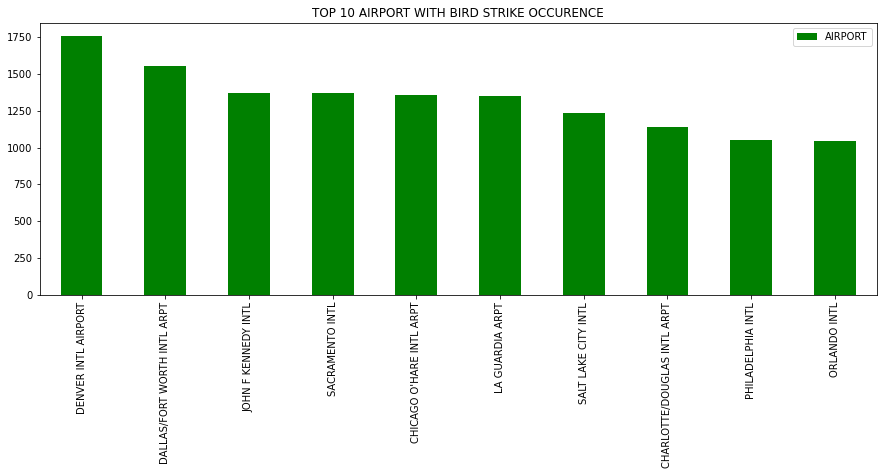

In [114]:
st= pd.DataFrame(strike['AIRPORT'].value_counts().head(10))
st.plot(kind= 'bar',figsize=(15,5), color= 'green')
plt.title("TOP 10 AIRPORT WITH BIRD STRIKE OCCURENCE")

Text(0.5, 1.0, 'TOP 10 SPECIES WITH BIRD STRIKE OCCURENCE')

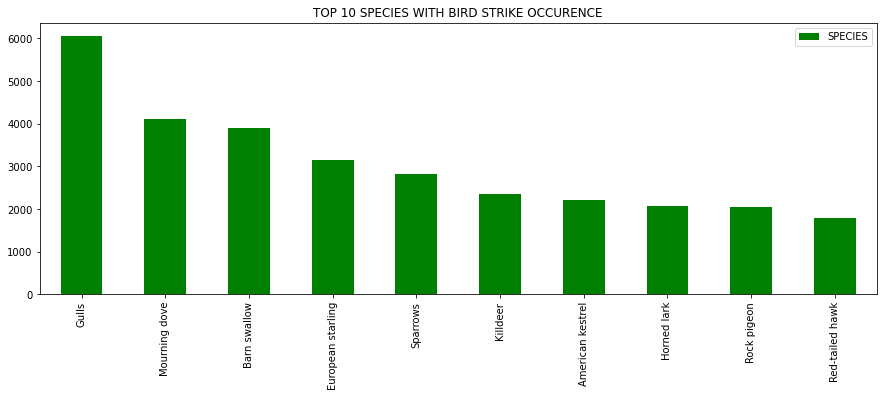

In [115]:
sp= pd.DataFrame(strike['SPECIES'].value_counts().head(10))
sp.plot(kind= 'bar',figsize=(15,5), color= 'green')
plt.title("TOP 10 SPECIES WITH BIRD STRIKE OCCURENCE")

<AxesSubplot:ylabel='SPECIES'>

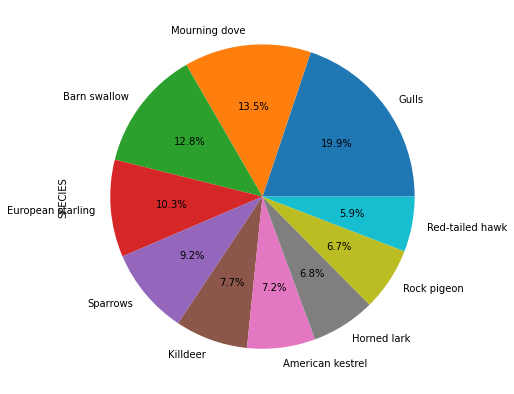

In [116]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sp['SPECIES'].plot.pie(autopct='%1.1f%%')


In [117]:
sp

,SPECIES
Gulls,6067
Mourning dove,4119
Barn swallow,3897
European starling,3158
Sparrows,2816
Killdeer,2360
American kestrel,2212
Horned lark,2080
Rock pigeon,2054
Red-tailed hawk,1788


In [118]:
species= ['Gulls','Mourning dove','Barn swallow','European starling','Sparrows','Killdeer','American kestrel',
'Horned lark','Rock pigeon','Red-tailed hawk']

In [119]:
bird_str = strike.loc[strike.SPECIES.isin(species)]

In [120]:
bird_str

,AIRPORT,LATITUDE,LONGITUDE,STATE,FAAREGION,OPERATOR,AIRCRAFT,AC_CLASS,AC_MASS,TYPE_ENG,...,SKY,PRECIPITATION,INDICATED_DAMAGE,SPECIES,SIZE,HOUR,MINUTES,YEAR,MONTH,WEEK_DAY
2,ORLANDO INTL,28.42889,-81.31603,FL,ASO,DELTA AIR LINES,B-757-200,A,4.0,D,...,Some Cloud,None,False,Mourning dove,Small,19,0,2014,August,Wednesday
3,BALTIMORE/WASH INTL THURGOOD MARSHAL ARPT,39.17540,-76.66820,MD,AEA,SOUTHWEST AIRLINES,B-737,A,4.0,D,...,No Cloud,None,False,European starling,Small,10,0,2006,July,Saturday
6,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,IL,AGL,COMPASS AIRLINES,EMB-170,A,4.0,D,...,Overcast,None,False,Barn swallow,Small,10,40,2010,July,Friday
10,ORLANDO INTL,28.42889,-81.31603,FL,ASO,SPIRIT AIRLINES,A-319,A,4.0,D,...,No Cloud,Rain,False,Barn swallow,Small,11,46,2019,August,Saturday
12,DETROIT METRO WAYNE COUNTY ARPT,42.21206,-83.34884,MI,AGL,DELTA AIR LINES,B-737-900,A,4.0,D,...,Some Cloud,None,False,Killdeer,Small,21,30,2019,June,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69547,SAN FRANCISCO INTL ARPT,37.61900,-122.37484,CA,AWP,WESTAIR COMMUTER,BA-31 JETSTR,A,2.0,C,...,No Cloud,None,True,Gulls,Medium,21,45,1994,August,Wednesday
69548,METRO OAKLAND INTL,37.72129,-122.22072,CA,AWP,SOUTHWEST AIRLINES,B-737-700,A,4.0,D,...,No Cloud,None,False,Gulls,Medium,11,37,2014,February,Saturday
69550,BUFFALO-NIAGARA INTL,42.94052,-78.73217,NY,AEA,UNITED AIRLINES,B-737-300,A,4.0,D,...,Some Cloud,None,False,Gulls,Medium,14,0,2002,February,Saturday
69552,DANBURY MUNICIPAL ARPT,41.37154,-73.48219,CT,ANE,PRIVATELY OWNED,MOONEY-20K,A,1.0,A,...,Overcast,Fog,False,Gulls,Medium,12,14,1993,September,Sunday


In [121]:
bird_str.shape

(30551, 24)

In [122]:
bird_str_sub= bird_str[['AIRPORT', 'SPECIES', 'SIZE' ,'INDICATED_DAMAGE']]

In [123]:
#subset dataset

bird_str_sub

,AIRPORT,SPECIES,SIZE,INDICATED_DAMAGE
2,ORLANDO INTL,Mourning dove,Small,False
3,BALTIMORE/WASH INTL THURGOOD MARSHAL ARPT,European starling,Small,False
6,CHICAGO O'HARE INTL ARPT,Barn swallow,Small,False
10,ORLANDO INTL,Barn swallow,Small,False
12,DETROIT METRO WAYNE COUNTY ARPT,Killdeer,Small,False
...,...,...,...,...
69547,SAN FRANCISCO INTL ARPT,Gulls,Medium,True
69548,METRO OAKLAND INTL,Gulls,Medium,False
69550,BUFFALO-NIAGARA INTL,Gulls,Medium,False
69552,DANBURY MUNICIPAL ARPT,Gulls,Medium,False


In [124]:
bird_str_sub['AIRPORT'].value_counts().head(15)

DENVER INTL AIRPORT                          1071
DALLAS/FORT WORTH INTL ARPT                   782
CHICAGO O'HARE INTL ARPT                      761
PHILADELPHIA INTL                             558
DETROIT METRO WAYNE COUNTY ARPT               495
KANSAS CITY INTL                              492
SALT LAKE CITY INTL                           422
JOHN F KENNEDY INTL                           405
LA GUARDIA ARPT                               395
CLEVELAND-HOPKINS INTL ARPT                   387
JOHN GLENN COLUMBUS INTL ARPT                 383
LOS ANGELES INTL                              368
ORLANDO INTL                                  366
HARTSFIELD - JACKSON ATLANTA INTL ARPT        360
BALTIMORE/WASH INTL THURGOOD MARSHAL ARPT     352
Name: AIRPORT, dtype: int64

In [125]:
ar_port= ["DENVER INTL AIRPORT","DALLAS/FORT WORTH INTL ARPT","CHICAGO O'HARE INTL ARPT","PHILADELPHIA INTL",
          "DETROIT METRO WAYNE COUNTY ARPT","KANSAS CITY INTL","SALT LAKE CITY INTL","JOHN F KENNEDY INTL",
          "LA GUARDIA ARPT","CLEVELAND-HOPKINS INTL ARPT","JOHN GLENN COLUMBUS INTL ARPT","LOS ANGELES INTL",
          "ORLANDO INTL","HARTSFIELD - JACKSON ATLANTA INTL ARPT","BALTIMORE/WASH INTL THURGOOD MARSHAL ARPT"]

In [126]:
bird_str_sub2= bird_str_sub.loc[bird_str_sub.AIRPORT.isin(ar_port)]

In [127]:
bird_str_sub2.shape

(7597, 4)

In [128]:
bird_str_sub2.tail()

,AIRPORT,SPECIES,SIZE,INDICATED_DAMAGE
69499,LOS ANGELES INTL,Gulls,Medium,False
69508,SALT LAKE CITY INTL,Horned lark,Small,False
69518,DENVER INTL AIRPORT,Horned lark,Small,False
69526,BALTIMORE/WASH INTL THURGOOD MARSHAL ARPT,Rock pigeon,Small,True
69535,DETROIT METRO WAYNE COUNTY ARPT,Barn swallow,Small,False


<AxesSubplot:xlabel='AIRPORT'>

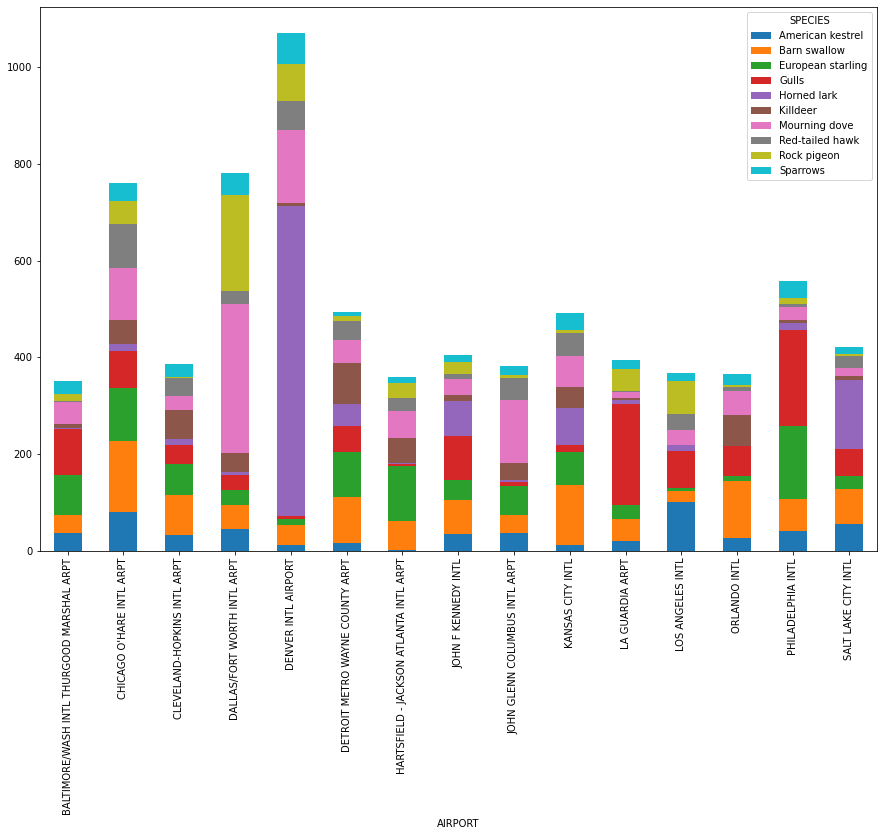

In [129]:
port_sp = pd.crosstab(bird_str_sub2['AIRPORT'],bird_str_sub2['SPECIES'])

port_sp.plot(kind='bar', stacked= True, figsize=(15,10))

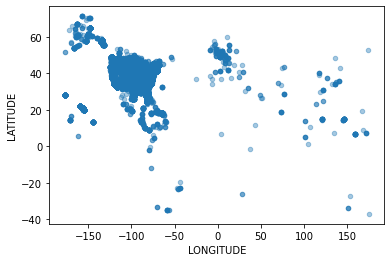

In [130]:
strike.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.4)
plt.show()

###### the above scatter plot reveal the concentration of airport in a region with high experience of bird strike occurences

In [131]:
#To import map use ipyleaflet
from ipyleaflet import (Map, Marker, DrawControl)

#Provide the longitude and latitude of the location
myMap= Map(center=[28.42889, -81.31603], zoom= 10)

# To draw shapes on the Map, 
dc= DrawControl(circle={'shapeOptions':{'color':'#0000FF'}})

# To create control on top of the map
myMap.add_control(dc)

myMap

Map(center=[28.42889, -81.31603], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

##### the map above is showing the Orlando Int'l airport location based on the geograhical location on the Longitude and Latitude, predominantly experience bird strike by Morning dove

In [132]:
from ipyleaflet import Map, Marker, DrawControl

start_loc = (41.16348, -73.12618)
m = Map(center=start_loc, zoom=16, scroll_wheel_zoom=True)
display(m)

marker = Marker(location=start_loc, draggable=False)
m.add_layer(marker)

# To draw shapes on the Map, 
dc= DrawControl(circle={'shapeOptions':{'color':'#0000FF'}})

# To create control on top of the map
m.add_control(dc)



Map(center=[41.16348, -73.12618], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 
style='margin:10px 5px'>FEATURE ENCODING</h2>
</div>

In [133]:
X_train.shape

(48689, 24)

In [134]:
X_test.shape

(20868, 24)

In [135]:
#select categorical feature from the X_train

from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(X_train)
categorical_columns

['AIRPORT',
 'STATE',
 'FAAREGION',
 'OPERATOR',
 'AIRCRAFT',
 'AC_CLASS',
 'TYPE_ENG',
 'PHASE_OF_FLIGHT',
 'SKY',
 'PRECIPITATION',
 'SPECIES',
 'SIZE',
 'MONTH',
 'WEEK_DAY']

In [136]:
X_train['SPECIES'].value_counts()

Gulls                         4234
Mourning dove                 2921
Barn swallow                  2696
European starling             2242
Sparrows                      2019
                              ... 
Redwing                          1
Northern saw-whet owl            1
Eurasian coot                    1
Sulphur-bellied flycatcher       1
Longspurs, snow buntings         1
Name: SPECIES, Length: 641, dtype: int64

In [137]:
X_train['PHASE_OF_FLIGHT'].value_counts()

Approach        17162
Landing Roll    13038
Take-off Run    10905
Climb            6199
Descent           362
Departure         340
Taxi              247
Local             206
Arrival           181
Parked             49
Name: PHASE_OF_FLIGHT, dtype: int64

In [138]:
#Convert target feature "INDICATED_DAMAGE" TRUE and FALSE responses to 1 or 0
X_train["INDICATED_DAMAGE"].replace({False: 0, True: 1}, inplace=True)
X_test  ["INDICATED_DAMAGE"].replace({False: 0, True: 1}, inplace=True)

In [139]:
#Count the number of observations per category of SPECIES, sort them in decreasing order, 
#and then display the five most frequent categories:
X_train['SPECIES'].value_counts().sort_values(ascending=False).head(5)

Gulls                4234
Mourning dove        2921
Barn swallow         2696
European starling    2242
Sparrows             2019
Name: SPECIES, dtype: int64

In [140]:
#To capture the most frequent categories of SPECIES & PHASE OF FLIGHT 
#in a list using the code in the step above inside a list comprehension:
top_5 = [cat for cat in X_train['SPECIES'].value_counts().sort_values(
        ascending=False).head(5).index]
top_F = [cat for cat in X_train['PHASE_OF_FLIGHT'].value_counts().sort_values(
        ascending=False).head(5).index]

#Now, let's capture the most frequent categories of SPECIES & PHASE OF FLIGHT
#in a list using the code in the step above inside a list comprehension:
top_test_5 = [cat for cat in X_test['SPECIES'].value_counts().sort_values(
        ascending=False).head(5).index]
top_test_F = [cat for cat in X_test['PHASE_OF_FLIGHT'].value_counts().sort_values(
        ascending=False).head(5).index]

In [141]:
top_F

['Approach', 'Landing Roll', 'Take-off Run', 'Climb', 'Descent']

In [142]:
#Using One-Hot encoder to encode selescted categorical features 

In [143]:
import numpy as np
#adding binary variable per top category in the train and test sets:
for category in top_5:
    X_train['SPECIES' + '_' + category] = np.where(X_train['SPECIES'] == category, 1, 0)
    
for category in top_test_5:
    X_test['SPECIES' + '_' + category] = np.where(X_test['SPECIES'] == category, 1, 0)

In [144]:
for category in top_F:
    X_train['PHASE_OF_FLIGHT' + '_' + category] = np.where(X_train['PHASE_OF_FLIGHT'] == category, 1, 0)
    
for category in top_test_F:    
    X_test['PHASE_OF_FLIGHT' + '_' + category] = np.where(X_test['PHASE_OF_FLIGHT'] == category, 1, 0)

In [145]:
X_train['TYPE_ENG'].unique()

array(['D', 'C', 'A', 'F', 'B', 'Y'], dtype=object)

In [146]:
X_train.shape

(48689, 34)

In [147]:
#Using Label encoder to encode all categorical feature

encoder = LabelEncoder()

In [148]:
#encoder to transform numerical values into corresponsding labels
"""taking all values with categorical values and one label to each of the unique values"""

df_categ = ['OPERATOR','AIRCRAFT','AIRPORT', 'AC_CLASS','TYPE_ENG','SKY', 'STATE','FAAREGION',
            'SIZE', 'MONTH', 'WEEK_DAY','PRECIPITATION']

X_train[df_categ] = X_train[df_categ].apply(encoder.fit_transform)
X_test[df_categ] = X_test[df_categ].apply(encoder.fit_transform)

In [149]:
X_train.head()

,AIRPORT,LATITUDE,LONGITUDE,STATE,FAAREGION,OPERATOR,AIRCRAFT,AC_CLASS,AC_MASS,TYPE_ENG,...,SPECIES_Gulls,SPECIES_Mourning dove,SPECIES_Barn swallow,SPECIES_European starling,SPECIES_Sparrows,PHASE_OF_FLIGHT_Approach,PHASE_OF_FLIGHT_Landing Roll,PHASE_OF_FLIGHT_Take-off Run,PHASE_OF_FLIGHT_Climb,PHASE_OF_FLIGHT_Descent
205843,275,41.97960,-87.90446,17,3,70,6,0,4.0,3,...,0,0,0,0,0,0,1,0,0,0
198635,716,41.16348,-73.12618,8,4,109,181,0,3.0,3,...,0,0,0,0,0,0,1,0,0,0
140935,1184,28.42889,-81.31603,11,6,167,63,0,4.0,3,...,0,1,0,0,0,0,1,0,0,0
68655,85,39.17540,-76.66820,24,2,409,47,0,4.0,3,...,0,0,0,1,0,1,0,0,0,0
162632,1279,45.58872,-122.59750,44,5,243,251,0,3.0,2,...,0,0,0,0,0,1,0,0,0,0


In [150]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20868 entries, 4599 to 130367
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AIRPORT                       20868 non-null  int32  
 1   LATITUDE                      20868 non-null  float64
 2   LONGITUDE                     20868 non-null  float64
 3   STATE                         20868 non-null  int32  
 4   FAAREGION                     20868 non-null  int32  
 5   OPERATOR                      20868 non-null  int32  
 6   AIRCRAFT                      20868 non-null  int32  
 7   AC_CLASS                      20868 non-null  int32  
 8   AC_MASS                       20868 non-null  float64
 9   TYPE_ENG                      20868 non-null  int32  
 10  NUM_ENGS                      20868 non-null  float64
 11  PHASE_OF_FLIGHT               20868 non-null  object 
 12  HEIGHT                        20868 non-null  float64
 1

In [151]:
X_train.drop(['LATITUDE','LONGITUDE','FAAREGION','OPERATOR','SPECIES', 'PHASE_OF_FLIGHT', 'AC_MASS', 'TYPE_ENG'], inplace = True, axis = 1)
X_test.drop(['LATITUDE','LONGITUDE','FAAREGION','OPERATOR','SPECIES', 'PHASE_OF_FLIGHT',  'AC_MASS', 'TYPE_ENG'], inplace = True, axis = 1)

In [152]:
#drop target variable into y_train and y_test

y_train = X_train['INDICATED_DAMAGE']
X_train = X_train.drop(['INDICATED_DAMAGE'], axis=1)

In [153]:
X_train.shape

(48689, 25)

In [154]:
#Separate the target variable from the dataset

y_test = X_test['INDICATED_DAMAGE']
X_test= X_test.drop(['INDICATED_DAMAGE'], axis=1)

In [155]:
X_test.shape

(20868, 25)

In [156]:
y_train.shape

(48689,)

In [157]:
y_test.shape

(20868,)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 
style='margin:10px 5px'>FEATURE SCALING</h2>
</div>

RobustScaler is used to scale our dataset because it is robust to outliers, as it may not always be a good practice to remove outliers. In such cases, we use RobustScaler of scikit-learn. It removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range).

In [158]:
#import the scikit-learn transformers:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [159]:
"""set up the StandardScaler() from scikit-learn so that it learns and subtracts the mean but does not divide the result
by the standard deviation:"""

scaler_mean = StandardScaler(with_mean=True, with_std=False)

In [160]:
"""Next, is to set up the RobustScaler() from scikit-learn so that it does not remove the median from the values but divides them by the value range, that is, the difference between the maximum and minimum values:
Specify (0, 100) in the quantile_range argument of RobustScaler() to divide by the difference between the minimum and maximum values,"""

scaler_minmax = RobustScaler(with_centering=False, with_scaling=True, quantile_range=(0, 100))

In [161]:
#fit the scalers to the train set so that they learn and store the mean, maximum, and minimum values:
scaler_mean.fit(X_train)
scaler_minmax.fit(X_train)

RobustScaler(quantile_range=(0, 100), with_centering=False)

The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). RobustScaler does not limit the scaled range by a predetermined interval, like in MinMaxScaler.

In [162]:
#fit the scalers to the train set so that they learn and store the mean, maximum, and minimum values:

scaler_mean.transform(X_train)
scaler_minmax.transform(X_train) 

array([[0.15414798, 0.27419355, 0.01232033, ..., 0.        , 0.        ,
        0.        ],
       [0.40134529, 0.12903226, 0.37166324, ..., 0.        , 0.        ,
        0.        ],
       [0.66367713, 0.17741935, 0.12936345, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.04428251, 0.43548387, 0.65297741, ..., 1.        , 0.        ,
        0.        ],
       [0.9293722 , 0.72580645, 0.55852156, ..., 0.        , 0.        ,
        0.        ],
       [0.21973094, 0.41935484, 0.56057495, ..., 0.        , 0.        ,
        0.        ]])

In [163]:
scaler_mean.transform(X_test)
scaler_minmax.transform(X_test)

array([[0.21244395, 0.96774194, 0.07597536, ..., 0.        , 0.        ,
        0.        ],
       [0.5426009 , 0.70967742, 0.36755647, ..., 0.        , 0.        ,
        0.        ],
       [0.06782511, 0.17741935, 0.25462012, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21244395, 0.96774194, 0.09240246, ..., 0.        , 0.        ,
        0.        ],
       [0.28979821, 0.66129032, 0.4825462 , ..., 1.        , 0.        ,
        0.        ],
       [0.21132287, 0.35483871, 0.09445585, ..., 1.        , 0.        ,
        0.        ]])

Fitting the entire dataset to the standard scaler object causes the model to learn about test set. However, models are not supposed to learn anything about test set. It destroys the purpose of train-test split. In general, this issue is called data leakage. This give rise to the reason behind X_test is not being fitted but only transformed.

In [164]:
X_train = pd.DataFrame(scaler_minmax.transform(X_train), columns= ['AIRPORT','STATE','AIRCRAFT','AC_CLASS',
'NUM_ENGS','HEIGHT','DISTANCE','SKY','PRECIPITATION','SIZE','HOUR','MINUTES','YEAR','MONTH','WEEK_DAY','SPECIES_Gulls','SPECIES_Mourning dove','SPECIES_Barn swallow',
'SPECIES_European starling','SPECIES_Sparrows','PHASE_OF_FLIGHT_Approach','PHASE_OF_FLIGHT_Landing Roll','PHASE_OF_FLIGHT_Take-off Run',
'PHASE_OF_FLIGHT_Climb','PHASE_OF_FLIGHT_Descent'])

X_test = pd.DataFrame(scaler_minmax.transform(X_test), columns= ['AIRPORT','STATE','AIRCRAFT','AC_CLASS',
'NUM_ENGS','HEIGHT','DISTANCE','SKY','PRECIPITATION','SIZE','HOUR','MINUTES','YEAR','MONTH','WEEK_DAY','SPECIES_Gulls','SPECIES_Mourning dove','SPECIES_Barn swallow',
'SPECIES_European starling','SPECIES_Sparrows','PHASE_OF_FLIGHT_Approach','PHASE_OF_FLIGHT_Landing Roll','PHASE_OF_FLIGHT_Take-off Run',
'PHASE_OF_FLIGHT_Climb','PHASE_OF_FLIGHT_Descent'])

In [165]:
X_train.head()

,AIRPORT,STATE,AIRCRAFT,AC_CLASS,NUM_ENGS,HEIGHT,DISTANCE,SKY,PRECIPITATION,SIZE,...,SPECIES_Gulls,SPECIES_Mourning dove,SPECIES_Barn swallow,SPECIES_European starling,SPECIES_Sparrows,PHASE_OF_FLIGHT_Approach,PHASE_OF_FLIGHT_Landing Roll,PHASE_OF_FLIGHT_Take-off Run,PHASE_OF_FLIGHT_Climb,PHASE_OF_FLIGHT_Descent
0,0.154148,0.274194,0.012320,0.0,0.666667,0.000000,0.000000,0.5,0.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.401345,0.129032,0.371663,0.0,0.666667,0.000000,0.000000,0.5,0.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.663677,0.177419,0.129363,0.0,0.666667,0.000000,0.000000,1.0,0.5,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.047646,0.387097,0.096509,0.0,0.666667,0.012503,0.011014,0.0,0.5,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.716928,0.709677,0.515400,0.0,0.666667,0.010737,0.009070,1.0,0.8,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [166]:
y_train.unique()

array([0, 1], dtype=int64)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 
style='margin:10px 5px'>DETECTING OUTLIERS</h2>
</div>

Text(0.5, 1.0, 'Boxplot')

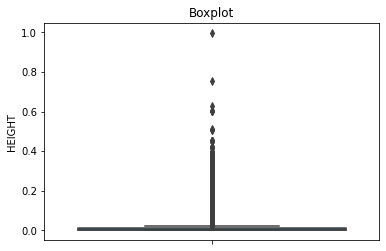

In [167]:
#Boxplot to examine outlier for column height
sns.boxplot(y=X_train['HEIGHT'])
plt.title('Boxplot')

Text(0.5, 1.0, 'Boxplot')

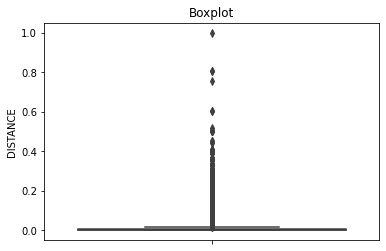

In [168]:
#Boxplot to examine outlier for column height
sns.boxplot(y=X_train['DISTANCE'])
plt.title('Boxplot')

In [169]:
#function to winsorize a variable to arbitrary upper and lower limits:
def winsorize(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                np.where(df[variable] < lower_limit, lower_limit, df[variable]))



In [170]:
#winsorize the DISTANCE variable:
X_train['DISTANCE']= winsorize(X_train, 'DISTANCE', X_train['DISTANCE'].quantile(0.95), X_train['DISTANCE'].quantile(0.05))
X_test['DISTANCE']= winsorize(X_test, 'DISTANCE', X_test['DISTANCE'].quantile(0.95), X_test['DISTANCE'].quantile(0.05))

In [171]:
X_train['DISTANCE'].quantile(0.95)
X_test['DISTANCE'].quantile(0.95)

0.052065606952240835

In [172]:
X_train['DISTANCE'].quantile(0.05)
X_test['DISTANCE'].quantile(0.05)

0.0

In [173]:
# winsorize the HEIGHT variable:
X_train['HEIGHT']= winsorize(X_train, 'HEIGHT', X_train['HEIGHT'].quantile(0.95), X_train['HEIGHT'].quantile(0.05))
X_test['HEIGHT']= winsorize(X_test, 'HEIGHT', X_test['HEIGHT'].quantile(0.95), X_test['HEIGHT'].quantile(0.05))

In [174]:
X_train['HEIGHT'].quantile(0.95)
X_test['HEIGHT'].quantile(0.95)

0.06005592211478815

In [175]:
X_train['HEIGHT'].quantile(0.05)
X_test['HEIGHT'].quantile(0.05)

0.0

In [176]:
X_train.tail(15)

,AIRPORT,STATE,AIRCRAFT,AC_CLASS,NUM_ENGS,HEIGHT,DISTANCE,SKY,PRECIPITATION,SIZE,...,SPECIES_Gulls,SPECIES_Mourning dove,SPECIES_Barn swallow,SPECIES_European starling,SPECIES_Sparrows,PHASE_OF_FLIGHT_Approach,PHASE_OF_FLIGHT_Landing Roll,PHASE_OF_FLIGHT_Take-off Run,PHASE_OF_FLIGHT_Climb,PHASE_OF_FLIGHT_Descent
48674,0.623879,0.564516,0.114990,0.0,0.666667,0.030028,0.020192,0.5,0.8,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
48675,0.219731,0.419355,0.090349,0.0,1.000000,0.000000,0.000000,0.5,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48676,0.549888,0.419355,0.431211,0.0,0.666667,0.000000,0.000000,0.5,0.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48677,0.614910,0.854839,0.747433,0.0,0.666667,0.000000,0.000000,0.0,0.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48678,0.292040,0.290323,0.459959,0.0,0.666667,0.000000,0.000000,0.5,0.2,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
48679,0.110987,0.258065,0.322382,0.0,0.333333,0.009400,0.008005,1.0,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48680,0.140695,0.500000,0.012320,0.0,0.666667,0.024022,0.020961,0.5,0.5,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48681,0.529709,0.096774,0.515400,0.0,0.666667,0.006006,0.005063,1.0,0.5,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48682,0.376682,0.516129,0.112936,0.0,0.666667,0.000000,0.000000,0.5,0.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48683,0.216928,0.112903,0.008214,0.0,0.666667,0.000000,0.000000,0.0,0.5,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Text(0.5, 1.0, 'Boxplot')

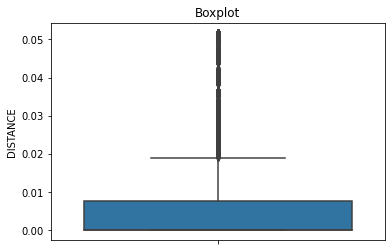

In [177]:
#Boxplot to examine outlier for column height
sns.boxplot(y=X_train['DISTANCE'])
plt.title('Boxplot')

Text(0.5, 1.0, 'Boxplot')

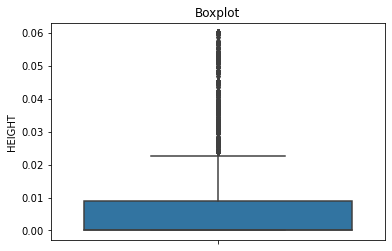

In [178]:
#Boxplot to examine outlier for column height
sns.boxplot(y=X_train['HEIGHT'])
plt.title('Boxplot')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 
style='margin:10px 5px'>FEATURE SELECTION</h2>
</div>

To carry out feature selection, the train_test_split will be joined together as a single dataset

In [179]:
#Concatenating the data in df variable

bird_strike_new =pd.concat([X_train, X_test],sort=False,ignore_index=True)
bird_strike_new 

,AIRPORT,STATE,AIRCRAFT,AC_CLASS,NUM_ENGS,HEIGHT,DISTANCE,SKY,PRECIPITATION,SIZE,...,SPECIES_Gulls,SPECIES_Mourning dove,SPECIES_Barn swallow,SPECIES_European starling,SPECIES_Sparrows,PHASE_OF_FLIGHT_Approach,PHASE_OF_FLIGHT_Landing Roll,PHASE_OF_FLIGHT_Take-off Run,PHASE_OF_FLIGHT_Climb,PHASE_OF_FLIGHT_Descent
0,0.154148,0.274194,0.012320,0.0,0.666667,0.000000,0.000000,0.5,0.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.401345,0.129032,0.371663,0.0,0.666667,0.000000,0.000000,0.5,0.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.663677,0.177419,0.129363,0.0,0.666667,0.000000,0.000000,1.0,0.5,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.047646,0.387097,0.096509,0.0,0.666667,0.012503,0.011014,0.0,0.5,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.716928,0.709677,0.515400,0.0,0.666667,0.010737,0.009070,1.0,0.8,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69552,0.133408,0.129032,0.689938,0.0,0.333333,0.000000,0.000000,0.5,0.0,0.5,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
69553,0.174327,0.725806,0.712526,0.0,0.333333,0.003003,0.002749,1.0,0.4,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
69554,0.212444,0.967742,0.092402,0.0,0.666667,0.000000,0.000000,1.0,0.4,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
69555,0.289798,0.661290,0.482546,0.0,0.666667,0.000000,0.000000,0.0,0.4,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [180]:
bird_strike_y =pd.concat([y_train, y_test],sort=False,ignore_index=True)
bird_strike_y 

0        0
1        1
2        0
3        0
4        0
        ..
69552    0
69553    0
69554    0
69555    0
69556    0
Name: INDICATED_DAMAGE, Length: 69557, dtype: int64

In [181]:
bird_strike_new.shape

(69557, 25)

In [182]:
bird_strike_y.shape

(69557,)

In [183]:
bird_strike_new['YEAR']

0        65.129032
1        65.096774
2        64.967742
3        64.709677
4        65.000000
           ...    
69552    64.290323
69553    65.064516
69554    64.903226
69555    65.032258
69556    64.935484
Name: YEAR, Length: 69557, dtype: float64

In [184]:
#Drop the year column
bird_strike_new.drop(['YEAR'], inplace = True, axis= 1)

In [185]:
bird_strike_new.shape

(69557, 24)

In [186]:
bird_strike_y.value_counts()

0    60658
1     8899
Name: INDICATED_DAMAGE, dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 
style='margin:10px 5px'>FEATURE IMPORTANCE</h2>
</div>

In [187]:
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from mlxtend.feature_selection import SequentialFeatureSelector #Sequential Feature Selection
from sklearn.ensemble import RandomForestClassifier #Random Forest for Feature Selection

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import SelectKBest,mutual_info_classif

##### Considering Decision Tree Classifier

In [188]:
#Using decision tree classifier feature importance
decision_tree = DecisionTreeClassifier(max_depth = 5)
decision_tree.fit(bird_strike_new, bird_strike_y)

DecisionTreeClassifier(max_depth=5)

In [189]:
predictors = bird_strike_new.columns

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values()
print(coef)

MINUTES                         0.000000
PHASE_OF_FLIGHT_Take-off Run    0.000000
SPECIES_Sparrows                0.000000
AC_CLASS                        0.000000
SPECIES_Barn swallow            0.000000
SPECIES_Mourning dove           0.000000
SKY                             0.000000
PRECIPITATION                   0.000000
WEEK_DAY                        0.000000
MONTH                           0.000000
SPECIES_European starling       0.000627
PHASE_OF_FLIGHT_Descent         0.000938
AIRPORT                         0.002080
PHASE_OF_FLIGHT_Approach        0.002364
HOUR                            0.003198
DISTANCE                        0.004386
STATE                           0.006365
SPECIES_Gulls                   0.009771
PHASE_OF_FLIGHT_Landing Roll    0.010143
AIRCRAFT                        0.019160
PHASE_OF_FLIGHT_Climb           0.033504
NUM_ENGS                        0.049421
HEIGHT                          0.135245
SIZE                            0.722797
dtype: float64


<AxesSubplot:title={'center':'Top Important 15 Features that can Help Predict Birdstrike Collision'}>

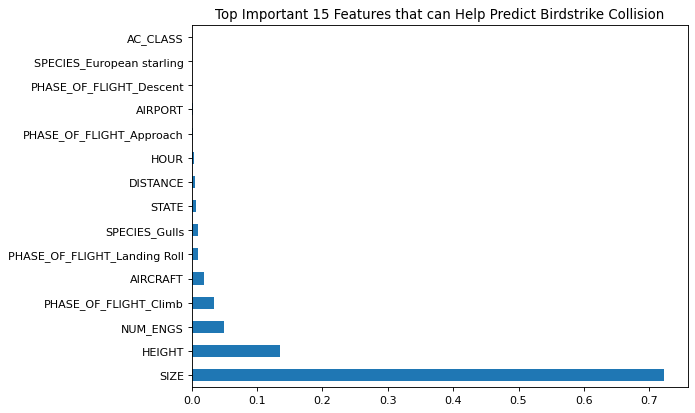

In [190]:
#Get the Top 10 features
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Top Important 15 Features that can Help Predict Birdstrike Collision")

feat_importances = pd.Series(decision_tree.feature_importances_, index= bird_strike_new.columns)

feat_importances.nlargest(15).plot(kind='barh')

##### Considering Random Forest Classifier 

In [191]:
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_estimators = 10),
                                             k_features = 15,
                                             forward = False, #forward selection
                                             scoring = "accuracy", # to score the classifier performanace
                                             cv = 4) #using training data for training and testing at same time

#CV means cross validation which uses available training data to inform your model,
#while also using that data to make predictions on how well the model will be able to predict outcomes on new data.

In [192]:
features = feature_selector.fit(np.array(bird_strike_new), bird_strike_y)

In [193]:
#Get the relevant variable
forward_feature_names = list(bird_strike_new.columns[list(features.k_feature_idx_)])

forward_feature_names

['AIRPORT',
 'STATE',
 'AIRCRAFT',
 'NUM_ENGS',
 'HEIGHT',
 'SKY',
 'SIZE',
 'HOUR',
 'MINUTES',
 'WEEK_DAY',
 'SPECIES_European starling',
 'SPECIES_Sparrows',
 'PHASE_OF_FLIGHT_Approach',
 'PHASE_OF_FLIGHT_Take-off Run',
 'PHASE_OF_FLIGHT_Descent']

In [194]:
#View the selected features
forward_features = bird_strike_new[forward_feature_names]

forward_features.head()

,AIRPORT,STATE,AIRCRAFT,NUM_ENGS,HEIGHT,SKY,SIZE,HOUR,MINUTES,WEEK_DAY,SPECIES_European starling,SPECIES_Sparrows,PHASE_OF_FLIGHT_Approach,PHASE_OF_FLIGHT_Take-off Run,PHASE_OF_FLIGHT_Descent
0,0.154148,0.274194,0.012320,0.666667,0.000000,0.5,1.0,0.478261,0.474576,0.333333,0.0,0.0,0.0,0.0,0.0
1,0.401345,0.129032,0.371663,0.666667,0.000000,0.5,0.0,0.869565,0.152542,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.663677,0.177419,0.129363,0.666667,0.000000,1.0,1.0,0.826087,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0
3,0.047646,0.387097,0.096509,0.666667,0.012503,0.0,1.0,0.434783,0.000000,0.333333,1.0,0.0,1.0,0.0,0.0
4,0.716928,0.709677,0.515400,0.666667,0.010737,1.0,1.0,0.913043,0.220339,0.333333,0.0,0.0,1.0,0.0,0.0


<AxesSubplot:>

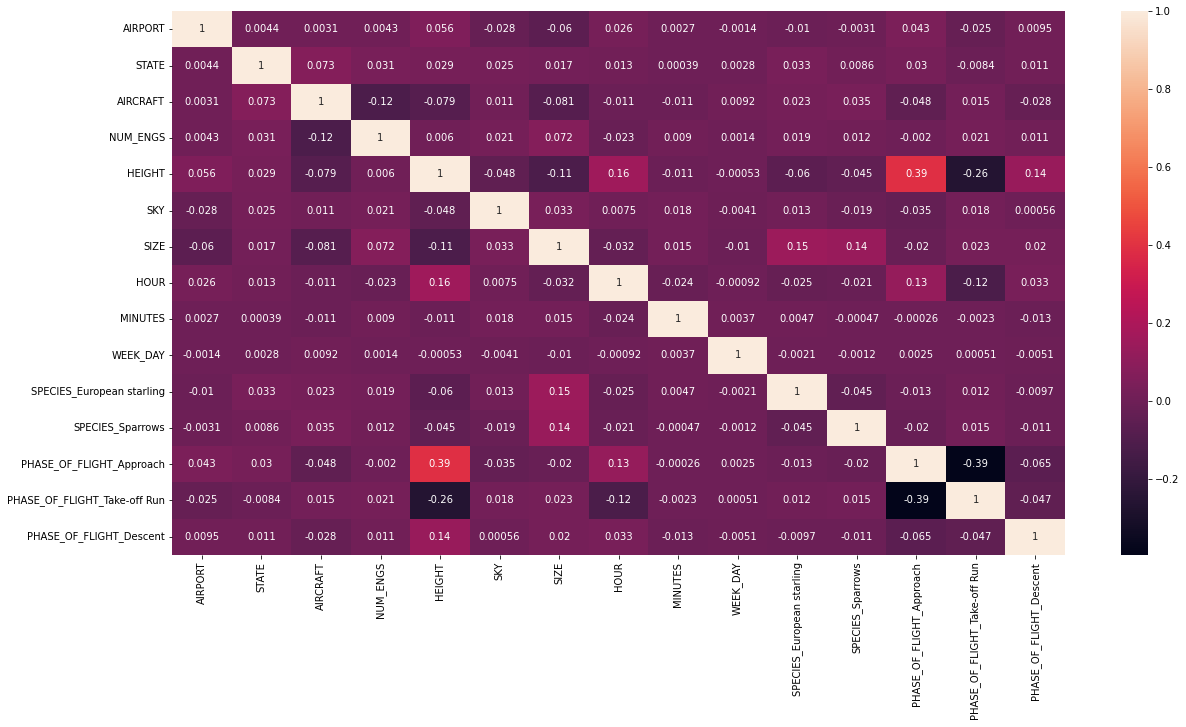

In [195]:
#finding correlation between target variable and other features
plt.figure(figsize=(20,10))
sns.heatmap(forward_features.corr(),annot=True)

##### Considering Mutual Information Classifier 

In [196]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif( bird_strike_new, bird_strike_y)
mutual_info

array([0.02597114, 0.00388617, 0.02932362, 0.00043229, 0.01831604,
       0.02202587, 0.02180429, 0.00233618, 0.00067449, 0.08475946,
       0.0008042 , 0.0015478 , 0.0044953 , 0.00107532, 0.        ,
       0.00381008, 0.00312369, 0.00309989, 0.00304255, 0.00255838,
       0.00475563, 0.00256262, 0.00840718, 0.00154259])

In [197]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = bird_strike_new.columns
mutual_info.sort_values(ascending=False)

SIZE                            0.084759
AIRCRAFT                        0.029324
AIRPORT                         0.025971
HEIGHT                          0.022026
DISTANCE                        0.021804
NUM_ENGS                        0.018316
PHASE_OF_FLIGHT_Climb           0.008407
PHASE_OF_FLIGHT_Landing Roll    0.004756
MONTH                           0.004495
STATE                           0.003886
SPECIES_Mourning dove           0.003810
SPECIES_Barn swallow            0.003124
SPECIES_European starling       0.003100
SPECIES_Sparrows                0.003043
PHASE_OF_FLIGHT_Take-off Run    0.002563
PHASE_OF_FLIGHT_Approach        0.002558
SKY                             0.002336
MINUTES                         0.001548
PHASE_OF_FLIGHT_Descent         0.001543
WEEK_DAY                        0.001075
HOUR                            0.000804
PRECIPITATION                   0.000674
AC_CLASS                        0.000432
SPECIES_Gulls                   0.000000
dtype: float64

<AxesSubplot:>

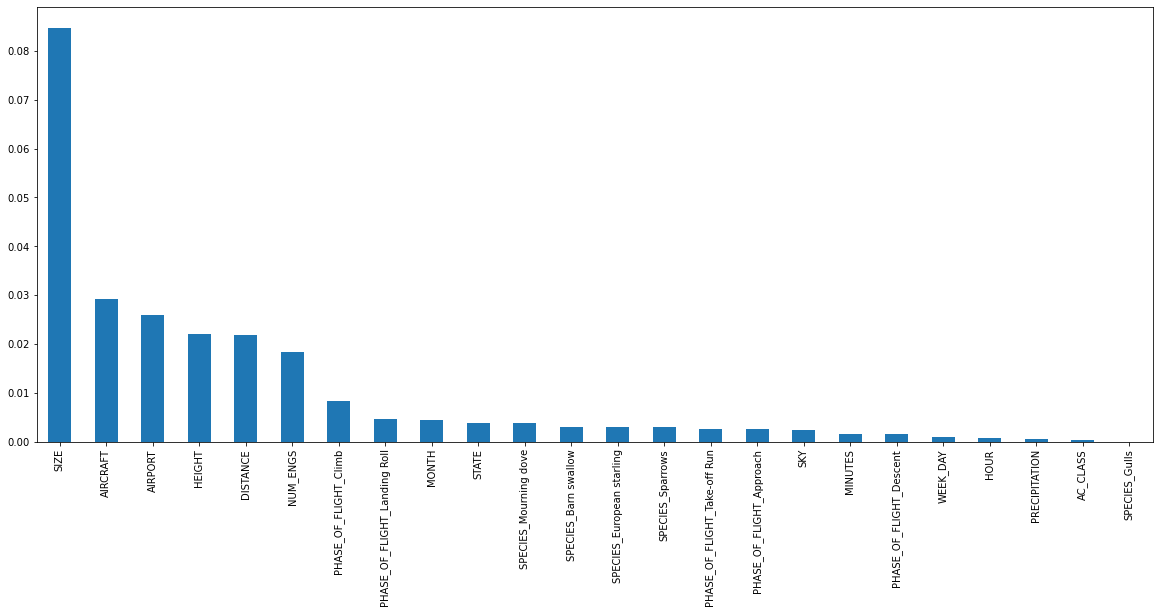

In [198]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

The first ten features selected does not include the species of bird, which is one of the essential features for our predictions, as a result the number of features to be selected is increased to fifteen features

##### Considering Mutual Information Classifier using KBest

In [199]:
#To select the top best 15 feature, using kbest

from sklearn.feature_selection import SelectKBest
sel_15_cols = SelectKBest(mutual_info_classif, k=15)
sel_15_cols.fit(bird_strike_new, bird_strike_y)
bird_strike_new.columns[sel_15_cols.get_support()]

Index(['AIRPORT', 'STATE', 'AIRCRAFT', 'NUM_ENGS', 'HEIGHT', 'DISTANCE', 'SKY',
       'PRECIPITATION', 'SIZE', 'HOUR', 'MINUTES', 'SPECIES_Mourning dove',
       'SPECIES_Barn swallow', 'PHASE_OF_FLIGHT_Landing Roll',
       'PHASE_OF_FLIGHT_Climb'],
      dtype='object')

The top ten features selected does not include the species of bird, which is one of the essential features for our predictions, as a result the number of features to be selected is increased to fifteen features. So these are the top fifteen features that give the most important information about the target variable.

Also, considering all the Feature Selection presented here, it is noteworthy that Mutual information Classifier using KBEST, selected substantial features than other feature selection techniques. Therefore, this techniques output is fed into the Machine Learning models as given below.

In [200]:
#Subset out the identified importance 15 features
Best_birdstrike_features= bird_strike_new[['AIRPORT', 'STATE', 'AIRCRAFT', 'NUM_ENGS', 'HEIGHT','DISTANCE',
                                         'SKY', 'SIZE', 'HOUR', 'MONTH', 'SPECIES_Mourning dove','SPECIES_Barn swallow',
                                         'PHASE_OF_FLIGHT_Landing Roll','PHASE_OF_FLIGHT_Climb']]

<AxesSubplot:ylabel='Frequency'>

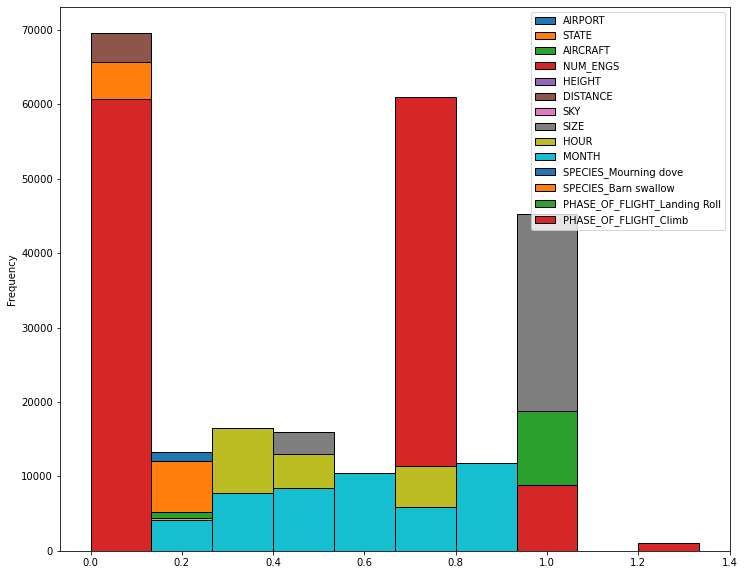

In [201]:
Best_birdstrike_features.plot.hist(figsize=(12, 10), edgecolor="black")
#Best_birdstrike_features.plot.bar(figsize=(20, 8))

#### Splitting of the bird_strike_new into train_test_split

In [202]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt 
import pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display
#from utils import plot_decision

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from collections import OrderedDict

In [203]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(Best_birdstrike_features, bird_strike_y, 
                                                                    test_size=0.3, random_state=0)

In [204]:
X_train.shape

(48689, 14)

In [205]:
X_test.shape

(20868, 14)

In [206]:
y_train.shape

(48689,)

In [207]:
y_test.shape

(20868,)

### Balancing of the Target Variable by Upsampling of Majority and Minority Class

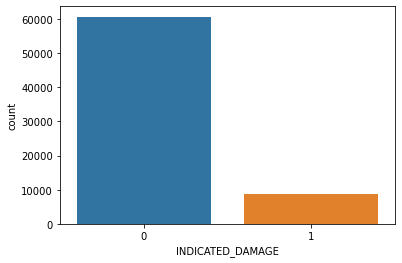

In [208]:
# We show the composition of the target variable for the training data. The target variable is not balance.
train_labels=bird_strike_y.to_frame()
sns.countplot(x='INDICATED_DAMAGE', data=train_labels)
plt.show()

In [209]:
### Balancing of the Target Variable by Upsampling of Majority and Minority Class

In [210]:
#Concatenate y_train and X_train to apply balancin.
bird_strike_bal = pd.concat([bird_strike_y, bird_strike_new], axis=1)
bird_strike_bal.shape

(69557, 25)

In [211]:
#import resample() library from sklearn

from sklearn.utils import resample

<AxesSubplot:xlabel='INDICATED_DAMAGE', ylabel='count'>

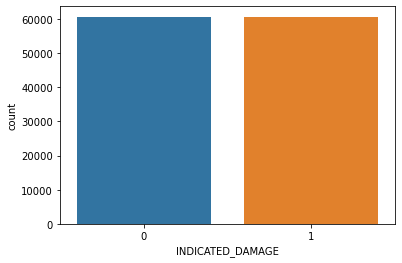

In [212]:
df_majority = bird_strike_bal[bird_strike_bal.INDICATED_DAMAGE==0]
df_minority = bird_strike_bal[bird_strike_bal.INDICATED_DAMAGE==1]

# Upsample minority class == 1
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=60557,  # to match majority class
                                 random_state=123) 

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

#Plot the new balanced target of training data
sns.countplot(x= 'INDICATED_DAMAGE', data=df_upsampled) 

In [213]:
# The final size of the upsampled data
df_upsampled.shape

(121215, 25)

<AxesSubplot:>

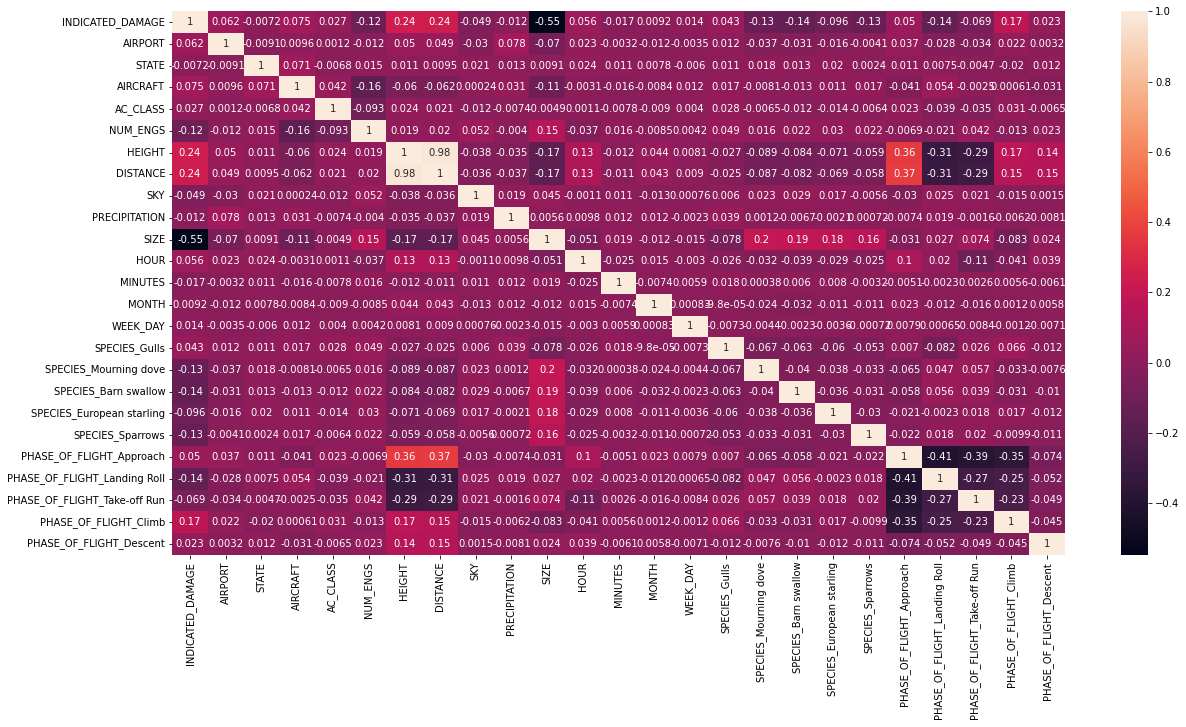

In [214]:
#finding correlation between target variable and other features
plt.figure(figsize=(20,10))
sns.heatmap(df_upsampled.corr(),annot=True)

Checking the correlation of the features with the target variable, it was discovered that Height and Distance are highly correlated with 0.98, which is not good for our modeling, thus the two columns are dropped, before going further as shown below

In [215]:
df_upsampled.drop(['HEIGHT', 'DISTANCE'], inplace= True,  axis= 1)

Text(0.5, 1.0, 'Correlation between Different Fearures')

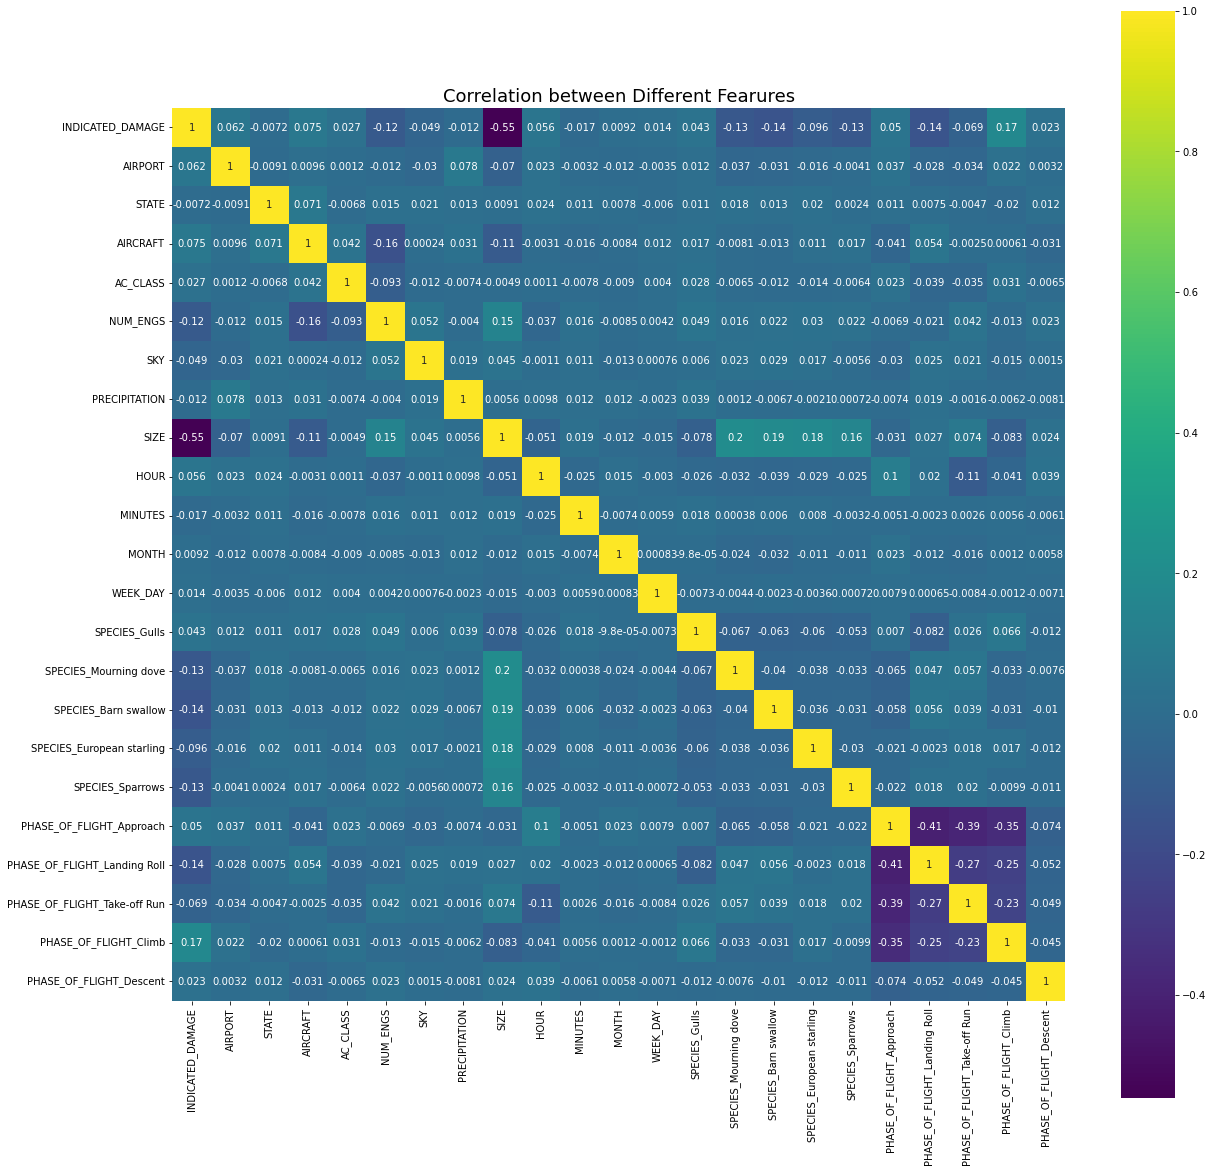

In [216]:
#Visual Correlation
correlation = df_upsampled.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between Different Fearures', size= 18)

In [217]:
#Final Balanced Training Label (Target)
y_train_balanced = df_upsampled["INDICATED_DAMAGE"] 
y_train_balanced

0        0
2        0
3        0
4        0
6        0
        ..
56476    1
36667    1
26476    1
28048    1
41542    1
Name: INDICATED_DAMAGE, Length: 121215, dtype: int64

In [218]:
# Final training features
X_train_new = df_upsampled.drop(["INDICATED_DAMAGE"], axis = 1)
X_train_new

,AIRPORT,STATE,AIRCRAFT,AC_CLASS,NUM_ENGS,SKY,PRECIPITATION,SIZE,HOUR,MINUTES,...,SPECIES_Gulls,SPECIES_Mourning dove,SPECIES_Barn swallow,SPECIES_European starling,SPECIES_Sparrows,PHASE_OF_FLIGHT_Approach,PHASE_OF_FLIGHT_Landing Roll,PHASE_OF_FLIGHT_Take-off Run,PHASE_OF_FLIGHT_Climb,PHASE_OF_FLIGHT_Descent
0,0.154148,0.274194,0.012320,0.0,0.666667,0.5,0.5,1.0,0.478261,0.474576,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.663677,0.177419,0.129363,0.0,0.666667,1.0,0.5,1.0,0.826087,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.047646,0.387097,0.096509,0.0,0.666667,0.0,0.5,1.0,0.434783,0.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.716928,0.709677,0.515400,0.0,0.666667,1.0,0.8,1.0,0.913043,0.220339,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.154148,0.274194,0.560575,0.0,0.666667,0.5,0.5,1.0,0.434783,0.677966,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56476,0.322309,0.645161,0.657084,0.0,0.666667,0.0,0.4,0.5,0.304348,0.661017,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36667,0.827915,0.016129,0.322382,0.0,0.333333,0.5,0.5,0.0,0.347826,0.338983,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26476,0.640135,0.725806,0.671458,0.0,0.666667,0.5,0.8,0.5,0.478261,0.728814,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28048,0.094731,0.129032,0.431211,0.0,0.666667,0.5,0.5,1.0,0.434783,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [219]:
#Confirmation of balanced training label to avoid bias in the machine learning training phase
y_train_balanced.value_counts()

0    60658
1    60557
Name: INDICATED_DAMAGE, dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 
style='margin:10px 5px'>BUILDING MACHINE LEARNING MODEL</h2>
</div>

### Decision Tree Training Model

In [220]:
# train the decision tree
dt_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Decision Tree Testing Model 

In [221]:
y_pred = dt_model.predict(X_test)

In [222]:
#Set up a function for Confusion Matrix
def CMatrix(CM, labels={"No BirdStrike":0,"BirdStrike": 1}):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='ACTUAL'
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [223]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.88


In [224]:
from sklearn.metrics import classification_report, confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred)
cm_dt_c= print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     18193
           1       0.67      0.14      0.23      2675

    accuracy                           0.88     20868
   macro avg       0.78      0.56      0.58     20868
weighted avg       0.86      0.88      0.84     20868



In [225]:
CMatrix(cm_dt)

PREDICTION,No BirdStrike,BirdStrike,Total
ACTUAL,,,
No BirdStrike,18011,182,18193
BirdStrike,2310,365,2675
Total,20321,547,20868


In [226]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(18011, 182, 2310, 365)

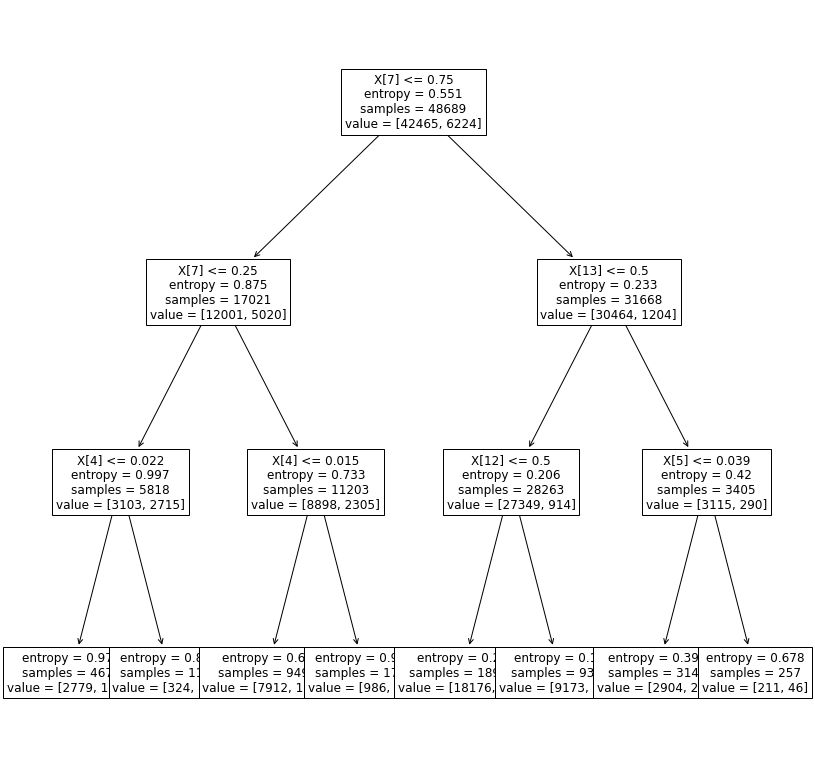

In [227]:
#Tree Analysis

#Visualize the tree and lets study the decision process
plt.figure(figsize=(14,14))  # set plot size (denoted in inches)
tree.plot_tree(dt_model, fontsize=12)
plt.show()

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Bird Strike Prediction using Logistic Regression</h2>
</div> 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Hyperparameter Tunning for Logistic Regression</h2>
</div>

In [228]:
# Hyperparameter Tunning for Logistic Regression
lr_model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.885019 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.885019 (0.003528) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.884991 (0.003522) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.884984 (0.003502) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.884977 (0.003592) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.884971 (0.003591) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.884977 (0.003584) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.884676 (0.003266) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.884669 (0.003264) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.884690 (0.003280) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.881924 (0.003740) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.881931 (0.003746) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.881931 (0.003738) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.879206 (0.003575) wit

In [229]:
# 1. Applying the Best Hyperparameter Tunning
logistic_regression = LogisticRegression(C=0.01,penalty="l2",solver="liblinear")

# 2. Using the trainning data to train the estimator (logistics Regression)
logistic_regression.fit(X_train, y_train)

# 3. Evaluating the model by predicting the test data
y_pred_test = logistic_regression.predict(X_test)

In [230]:
# y_pred_test of the trained logistic model will now be compared
#with the ground truth (y_test).
y_test

2002     0
18625    0
51562    0
15174    0
23705    0
        ..
1758     0
48932    0
31541    0
45053    1
34976    0
Name: INDICATED_DAMAGE, Length: 20868, dtype: int64

In [231]:
#Set up a function for Confusion Matrix
def CMatrix(CM, labels={"No BirdStrike":0,"BirdStrike": 1,}):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [232]:
CM = confusion_matrix(y_pred_test,y_test)

In [233]:
CMatrix(CM)

PREDICTION,No BirdStrike,BirdStrike,Total
TRUE,,,
No BirdStrike,17981,2316,20297
BirdStrike,212,359,571
Total,18193,2675,20868


In [234]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_test).ravel()
(tn, fp, fn, tp)

(17981, 212, 2316, 359)

In [235]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_pred_test)
print('Classification Report : \n',matrix)

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.99      0.93     18193
           1       0.63      0.13      0.22      2675

    accuracy                           0.88     20868
   macro avg       0.76      0.56      0.58     20868
weighted avg       0.85      0.88      0.84     20868



In [236]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Precision: %.3f' % precision_score(y_test, y_pred_test))
print('Recall: %.3f' % recall_score(y_test, y_pred_test))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_test))
print('F1-Score: %.3f' % f1_score(y_test, y_pred_test))

Precision: 0.629
Recall: 0.134
Accuracy: 0.879
F1-Score: 0.221


The result of this logistic Regression model confusion matrix reveal that the possibility of bird strike occurence is with 0.63 precision, the recall 0f 0.13, with f1-score of 0.22. The accuracy of the bird strike occurence is 88%. 

**Thus, this will informed the dcision of the stakeholders of what measure to put in place, seeing that there is high possibility/or probabality that bird strike would occur.

<AxesSubplot:>

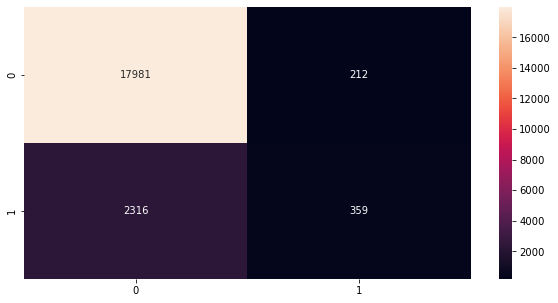

In [237]:
# Creating the confusion matrix graphs

cf_train_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10,5))
sns.heatmap(cf_train_matrix, annot=True, fmt='d')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Bird Strike Prdiction using K-Nearest Neighbour (KNN)</h2>
</div> 

In [238]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification
# 3-class Classification
X, y = make_classification(1000, n_features=10, n_redundant=0, n_informative=2, 
                           n_clusters_per_class=1, n_classes=3)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_predict = knn_model.predict(X_test)

In [239]:
# Measuring the accuracy of our model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))


0.8693214491086831


In [240]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[17427   766]
 [ 1961   714]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     18193
           1       0.48      0.27      0.34      2675

    accuracy                           0.87     20868
   macro avg       0.69      0.61      0.64     20868
weighted avg       0.85      0.87      0.85     20868



<AxesSubplot:>

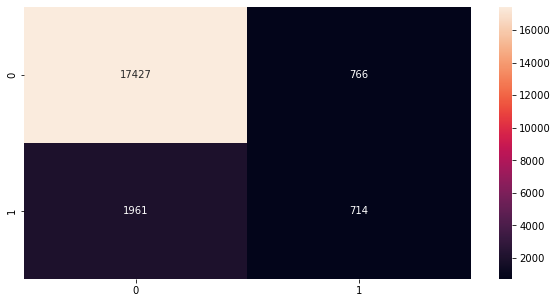

In [241]:
# Creating the confusion matrix graphs
import seaborn as sns
from matplotlib import pyplot as plt
cf_train_matrix = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(10,5))
sns.heatmap(cf_train_matrix, annot=True, fmt='d')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Bird Strike Prediction using NAIVE BAYES</h2>
</div>

In [242]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

bnb_model = BernoulliNB(binarize=0.0)
bnb_model.fit(X_train, y_train)
score =bnb_model.score(X_test, y_test)

In [243]:
#Predict the response for test dataset
y_prediction = bnb_model.predict(X_test)

In [244]:
cm = confusion_matrix(y_test, y_prediction) 
cm

array([[17659,   534],
       [ 2014,   661]], dtype=int64)

In [245]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     18193
           1       0.55      0.25      0.34      2675

    accuracy                           0.88     20868
   macro avg       0.73      0.61      0.64     20868
weighted avg       0.85      0.88      0.86     20868



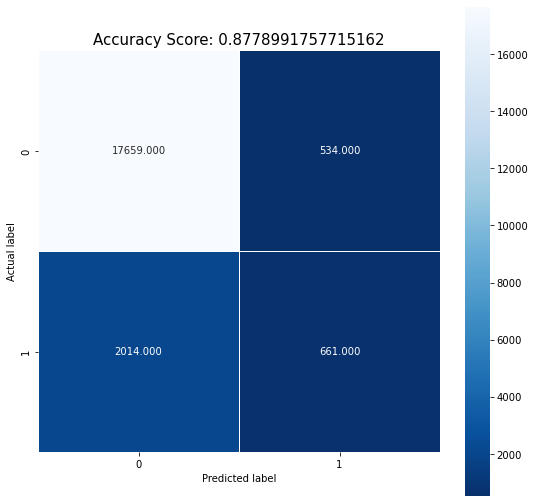

In [246]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); #formating style of the confusion matrix visualization
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Bird Strike Prediction using Support Vector Machine</h2>
</div>

In [247]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_model.fit(X_train, y_train)

#Predict the response for test dataset
y_preds = svm_model.predict(X_test)

Evaluating the Model estimation of how accurate the classifier or model can predict the bird strike occurence and indicate damage.

Accuracy is computed by comparing actual test set values and predicted values.

In [248]:
#Import scikit-learn metrics module for accuracy calculation

#Model Accuracy: how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_preds))

Accuracy: 0.8718133026643665


In [249]:
confusion_matrix(y_test, y_preds)

array([[18193,     0],
       [ 2675,     0]], dtype=int64)

<AxesSubplot:>

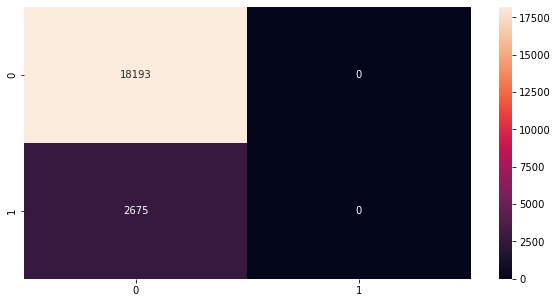

In [250]:
# Creating the confusion matrix graphs

cf_train_matrix = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(10,5))
sns.heatmap(cf_train_matrix, annot=True, fmt='d')

In [251]:
#Evaluation based on precision and recall of model.

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_preds))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_preds))

Precision: 0.0
Recall: 0.0


In [252]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     18193
           1       0.00      0.00      0.00      2675

    accuracy                           0.87     20868
   macro avg       0.44      0.50      0.47     20868
weighted avg       0.76      0.87      0.81     20868



SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm. They also use less memory because they use a subset of training points in the decision phase. SVM works well with a clear margin of separation and with high dimensional space.

Disadvantages SVM is not suitable for large datasets because of its high training time and it also takes more time in training compared to Naïve Bayes. It works poorly with overlapping classes and is also sensitive to the type of kernel used

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>ROC CURVE</h2>
</div>

### Plot ROC and compare AUC

**Area under the receiver operating characteristic curve(AUC/ROC)**

* Area under Curve(AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rae (tpr) versus a model false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1


This curve hugs the top left and has a very high area under the curve (AUC) so this model has performed well on bird strike test data set.

The dashed blue line approximates the line using Random Classifier

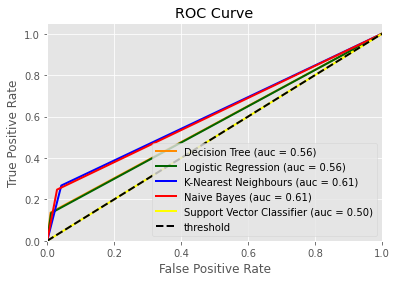

In [253]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

#Calcualte fpr, tpr, and thresholds
#for Decsion Tree
dt_fpr, dt_tpr, _ = roc_curve(y_test, y_pred)
dt_roc_auc = auc(dt_fpr, dt_tpr)

#for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_test)
lr_roc_auc = auc(lr_fpr, lr_tpr)

#for KNN
knn_fpr, knn_tpr, _ = roc_curve(y_test, y_predict)
knn_roc_auc = auc(knn_fpr, knn_tpr)


#for Naive Bayes
nb_fpr, nb_tpr, _ = roc_curve(y_test, y_prediction)
nb_roc_auc = auc(nb_fpr, nb_tpr)

#for Support Vector Machine
svm_fpr, svm_tpr, _ = roc_curve(y_test, y_preds)
svm_roc_auc = auc(svm_fpr, svm_tpr)


plt.figure()
plt.plot(dt_fpr, dt_tpr, color='darkorange',
         lw=2, label='Decision Tree (auc = %0.2f)' % dt_roc_auc)

plt.plot(lr_fpr, lr_tpr, color='darkgreen',
         lw=2, label='Logistic Regression (auc = %0.2f)' % lr_roc_auc)

plt.plot(knn_fpr, knn_tpr, color='blue',
         lw=2, label='K-Nearest Neighbours (auc = %0.2f)' % knn_roc_auc)

plt.plot(nb_fpr, nb_tpr, color='red',
         lw=2, label='Naive Bayes (auc = %0.2f)' % nb_roc_auc)

plt.plot(svm_fpr, svm_tpr, color='yellow',
         lw=2, label='Support Vector Classifier (auc = %0.2f)' % svm_roc_auc)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='threshold')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


SVM has 0.5 which is the same as the thresholds of the area of the curve. The highest performance of the classifier of the birdstrike prediction is K-Nearest Neigbor with 0.61.

The roc was executed on all the x_test datasets unlike the second graph.

In [254]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score for Decision Tree : {0:0.2f}'.format(average_precision))

Average precision-recall score for Decision Tree : 0.20


In [255]:
average_precision = average_precision_score(y_test, y_pred_test)

print('Average precision-recall score for Logistic Regression : {0:0.2f}'.format(average_precision))

Average precision-recall score for Logistic Regression : 0.20


In [256]:
average_precision = average_precision_score(y_test, y_predict)

print('Average precision-recall score for KNN : {0:0.2f}'.format(average_precision))

Average precision-recall score for KNN : 0.22


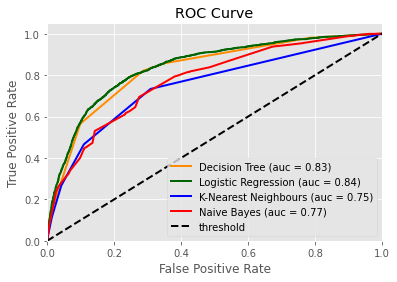

In [257]:
from sklearn.linear_model import LogisticRegression

dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_model.fit(X_train, y_train)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

nb_model = BernoulliNB(binarize=0.0)
nb_model.fit(X_train, y_train)

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)


#predictions with  probabilities
dt_predict_probabilities = dt_model.predict_proba(X_test)[:,1]
lr_predict_probabilities = lr_model.predict_proba(X_test)[:,1]
knn_predict_probabilities = knn_model.predict_proba(X_test)[:,1]
nb_predict_probabilities = nb_model.predict_proba(X_test)[:,1]
#svm_predict_probabilities = svm_model.predict_proba(X_test)[:,1]


dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_predict_probabilities)
dt_roc_auc = auc(dt_fpr, dt_tpr)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_predict_probabilities)
lr_roc_auc = auc(lr_fpr, lr_tpr)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_predict_probabilities)
knn_roc_auc = auc(knn_fpr, knn_tpr)

nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_predict_probabilities)
nb_roc_auc = auc(nb_fpr, nb_tpr)

#svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_predict_probabilities)
#svm_roc_auc = auc(svm_fpr, svm_tpr)


plt.figure()
plt.plot(dt_fpr, dt_tpr, color='darkorange',
         lw=2, label='Decision Tree (auc = %0.2f)' % dt_roc_auc)

plt.plot(lr_fpr, lr_tpr, color='darkgreen',
         lw=2, label='Logistic Regression (auc = %0.2f)' % lr_roc_auc)

plt.plot(knn_fpr, knn_tpr, color='blue',
         lw=2, label='K-Nearest Neighbours (auc = %0.2f)' % knn_roc_auc)

plt.plot(nb_fpr, nb_tpr, color='red',
         lw=2, label='Naive Bayes (auc = %0.2f)' % nb_roc_auc)

#plt.plot(svm_fpr, svm_tpr, color='red',
#         lw=2, label='Support Vector Classifier (auc = %0.2f)' % svm_roc_auc)


plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='threshold')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



From the output given above, the prediction probabilities of ROC measures the performance of the classifiers, and Logistic Regression outperformed other classifier with 0.84 area of curve.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>SAMPLE PREDICTIONS OF DIFFERENT MODELS</h2>
</div>

In [258]:
X_test.tail()

,AIRPORT,STATE,AIRCRAFT,NUM_ENGS,HEIGHT,DISTANCE,SKY,SIZE,HOUR,MONTH,SPECIES_Mourning dove,SPECIES_Barn swallow,PHASE_OF_FLIGHT_Landing Roll,PHASE_OF_FLIGHT_Climb
1758,0.404709,0.290323,0.322382,0.333333,0.000000,0.000000,0.0,0.5,0.347826,0.545455,0.0,0.0,0.0,0.0
48932,0.549327,0.096774,0.094456,0.666667,0.036034,0.040384,0.0,0.5,0.956522,0.090909,0.0,0.0,0.0,0.0
31541,0.906951,0.693548,0.562628,0.666667,0.060056,0.051756,0.5,1.0,0.869565,0.000000,0.0,0.0,0.0,0.0
45053,0.392377,0.338710,0.420945,0.666667,0.000000,0.000000,1.0,1.0,0.782609,0.181818,1.0,0.0,0.0,0.0
34976,0.784753,0.887097,0.010267,0.666667,0.012379,0.010610,0.5,0.5,0.391304,1.000000,0.0,0.0,0.0,0.0


In [259]:
X_test.shape

(20868, 14)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>SAMPLE PREDICTIONS USING LOGISTIC REGRESSION</h2>
</div>

In [260]:
def birdstrike_prediction(flight_data):
    flight_data = StandardScaler().fit_transform(flight_data.values.reshape(1, -1))
    prediction = logistic_regression.predict(flight_data)[0]
    proba = logistic_regression.predict_proba(flight_data)[0][0]
    
    if prediction == 0:
        return "There will be no BirdStrike (with {:0.2f}% chance)".format(100*proba)
    else:
        return "There will be BirdStrike (with {:0.2f}% chance)".format(100*(1-proba))

In [261]:
flight_data = OrderedDict([("AIRPORT", 0.7),("STATE", 0.5), ("AIRCRAFT", 0), ("NUM_ENGS", 1), ("HEIGHT", 0), ("DISTANCE", 0), 
                            ("SKY", 0), ("SIZE", 1), ("HOUR", 1), ("MONTH", 5), ("SPECIES_Mourning dove", 0), 
                            ("SPECIES_Barn swallow", 1), ("PHASE_OF_FLIGHT_Landing Roll", 0), ("PHASE_OF_FLIGHT_Climb", 1)])


new_flight_data = pd.Series(flight_data)
birdstrike_prediction(new_flight_data)

'There will be no BirdStrike (with 51.15% chance)'

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>SAMPLE PREDICTIONS USING KNN CLASSIFIER</h2>
</div>

In [262]:
def birdstrike_prediction(flight_data):
    flight_data = StandardScaler().fit_transform(flight_data.values.reshape(1, -1))
    prediction = knn_model.predict(flight_data)[0]
    proba = knn_model.predict_proba(flight_data)[0][0]
    
    if prediction == 0:
        return "There will be no BirdStrike (with {:0.2f}% chance)".format(100*proba)
    else:
        return "There will be BirdStrike (with {:0.2f}% chance)".format(100*(1-proba))

In [263]:
flight_data = OrderedDict([("AIRPORT", 0),("STATE", 0), ("AIRCRAFT", 0), ("NUM_ENGS", 1), ("HEIGHT", 750), ("DISTANCE", 0), 
                            ("SKY", 0), ("SIZE", 1), ("HOUR", 12), ("MONTH", 1), ("SPECIES_Mourning dove", 1), 
                            ("SPECIES_Barn swallow", 0), ("PHASE_OF_FLIGHT_Landing Roll", 1), ("PHASE_OF_FLIGHT_Climb", 0)])


new_flight_data = pd.Series(flight_data)
birdstrike_prediction(new_flight_data)

'There will be BirdStrike (with 80.00% chance)'

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>SAMPLE PREDICTIONS USING DECISION TREE</h2>
</div>

In [264]:
def birdstrike_prediction(flight_data):
    flight_data = StandardScaler().fit_transform(flight_data.values.reshape(1, -1))
    prediction = dt_model.predict(flight_data)[0]
    proba = dt_model.predict_proba(flight_data)[0][0]
    
    if prediction == 0:
        return "There will be no BirdStrike (with {:0.2f}% chance)".format(100*proba)
    else:
        return "There will be BirdStrike (with {:0.2f}% chance)".format(100*(1-proba))

In [265]:
flight_data = OrderedDict([("AIRPORT", 0),("STATE", 0), ("AIRCRAFT", 0), ("NUM_ENGS", 1), ("HEIGHT", 750), ("DISTANCE", 0), 
                            ("SKY", 0), ("SIZE", 1), ("HOUR", 12), ("MONTH", 1), ("SPECIES_Mourning dove", 1), 
                            ("SPECIES_Barn swallow", 0), ("PHASE_OF_FLIGHT_Landing Roll", 1), ("PHASE_OF_FLIGHT_Climb", 0)])


new_flight_data = pd.Series(flight_data)
birdstrike_prediction(new_flight_data)

'There will be no BirdStrike (with 59.47% chance)'